# Archibald Prize

This is an exploratory data analysis of collected data from [Art Gallery NSW](https://www.artgallery.nsw.gov.au/) among other external sources. We focus on the Archibald Prize and take a deep dive into temporal trends relating to gender, portrait characteristics and career paths. Data ranges over 100 years (1921-2022).

The data consists of...
- participation records
- prize money records
- image data of winning potraits
- basic biographical data for winners

### Import packages and pre-process data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import StrMethodFormatter
from webcolors import CSS3_NAMES_TO_HEX
import seaborn as sns
sns.set(style='white', context='paper')

from os import listdir
from os.path import isfile, join
from PIL import Image
from PIL.ImageStat import Stat
import math

import requests
from bs4 import BeautifulSoup
from os.path  import basename

########### 1. Collect data from the Art Gallery of NSW website ###########
# global mainURL
# mainURL = 'https://www.artgallery.nsw.gov.au/'

# def assort_prize_metadata(text):
#     prize_dict = dict({'Entries':'',
#                        'Presenting partner':'',
#                        'Sponsor':'',
#                        'Exhibition dates':'', 
#                        'Misc.':'',
#                        'Text':''})
#     for t in text:
#         for k in list(prize_dict.keys())[:-2]:
#             if k in t: 
#                 if '  ' not in t: prize_dict[k] = t.strip().replace(k + ': ','')
#                 else: 
#                     prize_dict[k] = t.split('  ')[0]
#                     prize_dict['Text'] = t.split(prize_dict[k])[1]
#                 break

#     if prize_dict['Text'] == '':
#         prize_dict['Misc.'] = text[-1].split('  ')[0]
#         if len(prize_dict['Misc.']): 
#             prize_dict['Text'] = text[-1].split(prize_dict['Misc.'])[1]    
        
#     return prize_dict

# def collect_records(prize = 'archibald', prize_year = 1921):
#     prize_url = mainURL + "prizes/" + prize + '/' + str(prize_year)
#     page = requests.get(prize_url)
#     soup = BeautifulSoup(page.content, "html.parser")
    
#     # fetch winner data
#     try:
#         winner_artist = soup.find_all("span", class_="card-prizesWinner-artist")[0].text
#         winner_title = soup.find_all("span", class_="card-prizesWinner-title")[0].text
        
#         try: 
#             winner_image = soup.find_all("img", class_="card-prizesWinner-image")[0].get('src')
#             with open('ArchibaldWinners/' + str(yr) + '_' + basename(mainURL + winner_image), "wb") as f: 
#                 f.write(requests.get(mainURL + winner_image).content)
#         except: winner_image = None
        
#         winner_info = [winner_artist,winner_title,winner_image]
#     except:
#         winner_info = [None,None,None]
    
#     # download winning image
#     # with open(basename(winner_image),"wb") as f: f.write(requests.get(mainURL + winner_image).content)

#     # pre-process
#     delimiter = '###'                           # unambiguous string
#     for line_break in soup.findAll('br'):       # loop through line break tags
#         line_break.replaceWith(delimiter)       # replace br tags with delimiter
#     textModule = soup.find("div", class_="grid text").get_text().split(delimiter)  # get list of strings
    
#     # fetch prize metadata
#     prize_metadata_dict = assort_prize_metadata(text=textModule)
#     prize_metadata_dict['winner_info'] = winner_info
    
#     # fetch participant data
#     participants = []
    
#     if len(soup.find_all("div", class_="grid text")) > 1:
#         for item in soup.find_all("div", class_="grid text")[1].find_all('ul')[0].find_all('li'):
            
#             try: participant_href = item.find_all("a")[0].get('href')
#             except: participant_href = ''
                
#             participant_artist = item.find_all("strong")[0].text
#             participant_title = item.find_all("em")[0].text
            
#             try: participant_label = item.text.split(participant_title)[-1].strip()
#             except: participant_label = ''
                
#             participants.append([participant_href, participant_artist, participant_title, participant_label])
#     else:
#         for item in soup.find_all("div", class_="artworksList-item"):
#             participant_href = item.find_all("a", class_="card-artwork-link")[0].get('href')
#             participant_artist = item.find_all("span", class_="card-artwork-artist")[0].text
#             participant_title = item.find_all("span", class_="card-artwork-title")[0].text
#             participant_label = item.find_all("p", class_="card-artwork-label")[0].text
#             participants.append([participant_href, participant_artist, participant_title, participant_label])
            
#     prize_metadata_dict['participant_info'] = participants
#     return prize_metadata_dict

# archibald_data_dict = dict({'Prize Data':[],'Year':[]})

# # pre 1991/92
# for yr in range(1921,1991):
#     try: archibald_data_dict['Prize Data'].append(
#         collect_records(prize = 'archibald', prize_year = yr))
#     except: archibald_data_dict['Prize Data'].append(None)
#     archibald_data_dict['Year'].append(yr)

# # 1991/92 exception
# try: archibald_data_dict['Prize Data'].append(
#     collect_records(prize = 'archibald', prize_year = '1991-92'))
# except: archibald_data_dict['Prize Data'].append(None)
# archibald_data_dict['Year'].append('1992')

# # post 1991/92
# for yr in range(1993,2023):
#     try: archibald_data_dict['Prize Data'].append(
#         collect_records(prize = 'archibald', prize_year = yr))
#     except: archibald_data_dict['Prize Data'].append(None)
#     archibald_data_dict['Year'].append(yr)

########### Convert dictionary as dataframe and write as csv file ###########
# archies = pd.DataFrame(archibald_data_dict)
# archies.to_csv('data/archies.csv', index=False)

########### Read csv file as dataframe ###########
# this imported dataset was further preprocessed by filtering on winners 
# and adding columns in regard to each winner's biographical information
# along with corresponding ANZSCO classification data
archies = pd.read_csv('data/archies_v2.csv')

# We show a transposed of the first three rows of the dataframe
archies.head(3).T

0  \
YEAR                                                                    1921   
WINNER                                                           W B McInnes   
GENDER                                                                  Male   
DOB                                                                   1889.0   
DOD                                                                   1939.0   
Unnamed: 5                                                                32   
PORTRAIT TITLE                                               Desbrowe Annear   
Sitter                                                Harold Desbrowe-Annear   
DOB.1                                                                 1865.0   
Sitter Age                                                              56.0   
Self                                                                       0   
PORTRAIT GENDER                                                         Male   
PORTRAIT OCC (Copy/Paste)                                                NaN   
OCC. CATEGORY (1)                                                  Architect   
OCC. CATEGORY (2)                                                  Architect   
ANZSCO_1                   Design, Engineering, Science and Transport Pro...   
ANZSCO_2                                                       Professionals   
Comments                   With his (McInnes) wife, fellow artist Violet ...   

                                                                           1  \
YEAR                                                                    1922   
WINNER                                                           W B McInnes   
GENDER                                                                  Male   
DOB                                                                   1889.0   
DOD                                                                   1939.0   
Unnamed: 5                                                                33   
PORTRAIT TITLE                                      Professor Harrison Moore   
Sitter                                                William Harrison Moore   
DOB.1                                                                 1867.0   
Sitter Age                                                              55.0   
Self                                                                       0   
PORTRAIT GENDER                                                         Male   
PORTRAIT OCC (Copy/Paste)  constitutional lawyer and dean of the law facu...   
OCC. CATEGORY (1)                                                  Professor   
OCC. CATEGORY (2)                                                  Professor   
ANZSCO_1                                             Education Professionals   
ANZSCO_2                                                       Professionals   
Comments                   New rules were added to the competition this y...   

                                                                           2  
YEAR                                                                    1923  
WINNER                                                           W B McInnes  
GENDER                                                                  Male  
DOB                                                                   1889.0  
DOD                                                                   1939.0  
Unnamed: 5                                                                34  
PORTRAIT TITLE                                            Portrait of a lady  
Sitter                                                        Violet McInnes  
DOB.1                                                                 1892.0  
Sitter Age                                                              31.0  
Self                                                                       0  
PORTRAIT GENDER                                                       Female  
PORTRA

### Gender distribution

#### Male and female distribution for Archibald winners
We use a donut chart to explore how gender has been recorded for Archibald winners; 88% of the data has been recorded as Male and 12% as Female.

It should be noted that for three years (1964, 1980 and 1991), there were no Archibald prize winners.

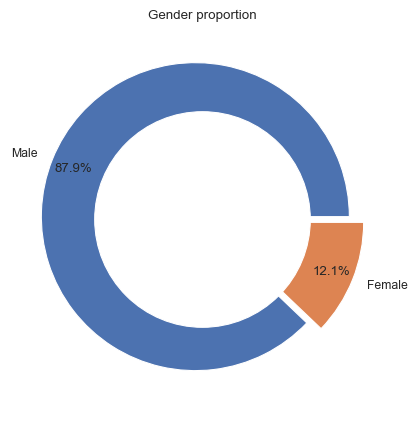

In [164]:
## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(archies["GENDER"])).items(),
                              columns=["Gender","Frequency"])

# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender[~df_gender.Gender.isnull()]['Frequency'], labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion')
  
# Displaying Chart
plt.show()

#### Male and female distribution of sitters for winning Archibald portraits
Beyond the winning painter, we also assess the gender distribution of the sitters within the winning portraits Again we use a donut chart to explore the distribution. According data collected from various online sources, we found that 82% of sitters were recorded as Male, and 18% as Female.

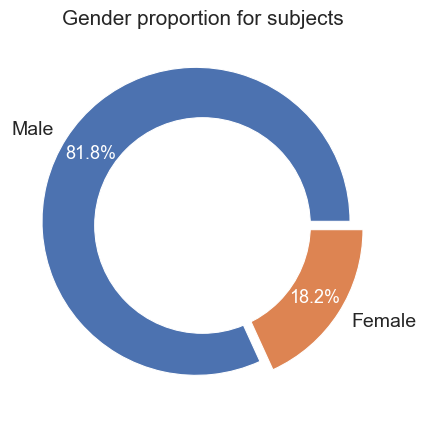

In [362]:
## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(archies["PORTRAIT GENDER"])).items(),
                              columns=["Gender","Frequency"])

# explosion
explode = (0.05, 0.05)

# plt.rcParams.update(plt.rcParamsDefault)
# # plt.rcParams['font.size'] = 14
# # plt.rcParams['text.color'] = 'white'

# Pie Chart
patches, texts, autotexts = plt.pie(df_gender[~df_gender.Gender.isnull()]['Frequency'], labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.815, #textprops={'color':"w", 'fontsize':13},
        explode=explode)

texts[0].set_fontsize(14); texts[1].set_fontsize(14)

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion for subjects', fontsize=15)
  
# Displaying Chart
plt.show()

# fig.savefig('subject_genders.png', dpi=330)

#### Do males paint males?
We also consider the gender distribution of sitters by male and female Archibald winners. The clustered bar chart shows that 86% of winning portraits painted by males consisted of male sitters. This differs quite a bit to winning portraits painted by females, which consists of an even distribution (50% male sitters, 50% female sitters). It should be noted that there are 12 winning portraits painted by females.

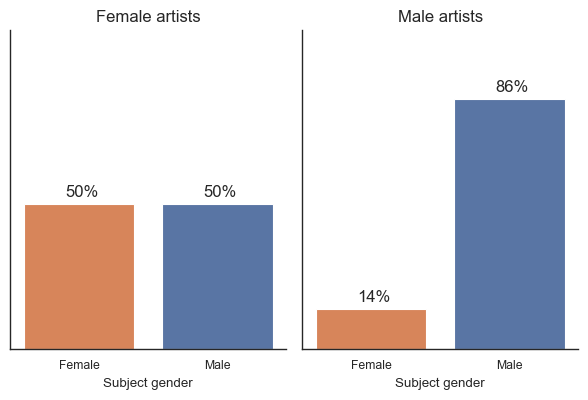

In [363]:
# create a crosstab table
df_crosstab = pd.crosstab(index=archies['GENDER'], columns=archies['PORTRAIT GENDER'], normalize='index')

# convert the crosstab table to a tidy format
df_tidy = pd.crosstab(archies['GENDER'], archies['PORTRAIT GENDER'], normalize='index').stack().reset_index()
df_tidy.columns = ['Artist Gender', 'Subject gender', 'Proportion']

g = sns.FacetGrid(df_tidy, col="Artist Gender")
g.map(sns.barplot, "Subject gender", "Proportion", order=["Female", "Male"], palette=['#EC7E45', '#4C72B0'])

g.set_titles(
    col_template="{col_name} artists",
    size=12,
)

# change y-axis limits
g.set(ylim=(0, 1.1))

# remove y-axis ticks and labels
g.set(yticks=[])
g.set(yticklabels=[])
g.set(ylabel=None)

# For each bar, add the label with rounded value
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate('{:.0%}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.025), size=12)

# increase figure size'
g.fig.set_figwidth(6.5)
g.fig.set_figheight(4.5)

plt.show()

# g.savefig('subject_genders_by_artist_gender.png', dpi=330)

In [361]:
# ax = pd.crosstab(archies['GENDER'], archies['PORTRAIT GENDER'], normalize='index')\
# .plot(kind='bar', rot=0)

# # Get bar heights for each bar in the plot
# bar_heights = [p.get_height() for p in ax.patches]

# # For each bar, add the label with rounded value
# for i, b in enumerate(ax.patches):
#     # if i < 2:
#     #     b.set_color('#1f77b4')
#     # else:
#     #     b.set_color('#ff7f0e')

#     ax.text(b.get_x() + b.get_width()/2,
#             b.get_height() + 0.01,
#             str(round(round(bar_heights[i], 2)*100,2)) + '%',
#             ha='center', size=12)

# # increase ylim
# ax.set_ylim(0,1)

# # remove y-axis ticks and labels
# ax.set_yticks([])
# ax.set_yticklabels([])
# ax.yaxis.label.set_visible(False)

# # remove x-axis title
# ax.set_xlabel('Artist gender')

# # increase x-axis labels font size
# ax.tick_params(axis='x', labelsize=11)

# # increae x-axis title font size
# ax.xaxis.label.set_fontsize(12)

# # set legend title
# ax.legend(title='', loc='upper left', ncol=1)

# # increase legend font sie
# ax.get_legend().get_texts()[0].set_fontsize('12')
# ax.get_legend().get_texts()[1].set_fontsize('12')

# # change labels in legend
# ax.get_legend().get_texts()[0].set_text('Male subject')
# ax.get_legend().get_texts()[1].set_text('Female subject')

# # make first two bars darker
# ax.patches[0].set_color('#819CC7')
# ax.patches[2].set_color('#EAAF8E')

# ax.patches[1].set_color('#4C72B0')
# ax.patches[3].set_color('#EC7E45')

# plt.show()

```{epigraph}
Across winning portraits, it is 36% more likely that a sitter will be female if the painter is female. 
```

#### Male and female distribution over time 
The two time series visualisations below showcase the number of Archibald winners and sitters across twenty-year brackets. The data for Archibald winners reveals that only in recent decades have females won a higher proportion of Archibald prizes in comparison to their corresponding vicennium. The trend for sitters also shares a similar pattern to the Archibald winners time series. Following our previous insights, this suggests that as more female artists win Archibalds, there is a corresponding increase in the number of female sitters being painted.

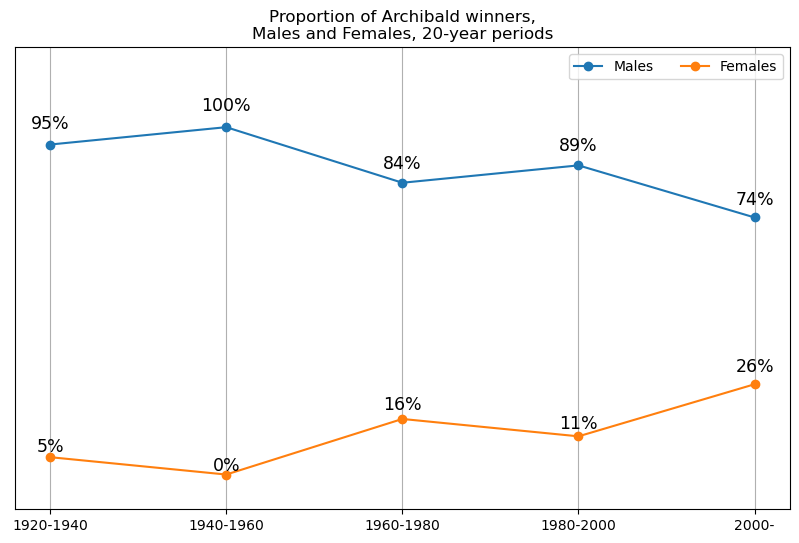

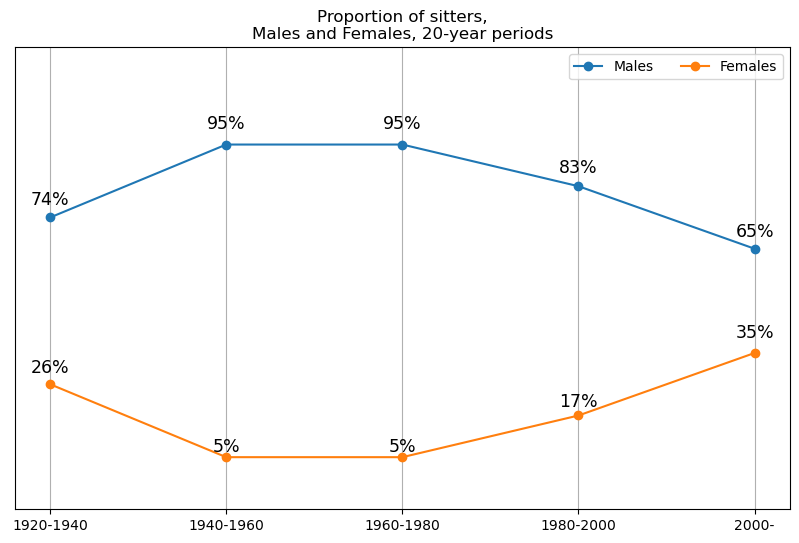

In [6]:
### create a new column for the year of the vicennium
archies['year_vicennium'] = [ int(np.floor(int(year)/20) * 20) 
                            for year in np.array(archies['YEAR'])]

archies['year_vicennium'] = np.where(archies['year_vicennium'] == 2020, 2000, archies['year_vicennium'])

### get count by gender
males_tab = archies[archies['GENDER'] == 'Male']['year_vicennium']\
.value_counts()\
.reset_index()\
.sort_values('index')

females_tab = archies[archies['GENDER'] == 'Female']['year_vicennium']\
.value_counts()\
.reset_index()\
.sort_values('index')

males_sitters_tab = archies[archies['PORTRAIT GENDER'] == 'Male']['year_vicennium']\
.value_counts()\
.reset_index()\
.sort_values('index')

females_sitters_tab = archies[archies['PORTRAIT GENDER'] == 'Female']['year_vicennium']\
.value_counts()\
.reset_index()\
.sort_values('index')

### merge tables and get row proportions for Males and Females
count_by_gender = pd.merge(males_tab, females_tab, on='index', how='outer').fillna(0)
count_by_gender.columns = ['Vicennium', 'Males', 'Females']
count_by_gender['Females_Prop'] = round(count_by_gender['Females']/(count_by_gender['Females'] + count_by_gender['Males']),2)
count_by_gender['Males_Prop'] = round(count_by_gender['Males']/(count_by_gender['Females'] + count_by_gender['Males']),2)

count_by_gender_sitter = pd.merge(males_sitters_tab, females_sitters_tab, on='index', how='outer').fillna(0)
count_by_gender_sitter.columns = ['Vicennium', 'Males', 'Females']
count_by_gender_sitter['Females_Prop'] = round(count_by_gender_sitter['Females']/(count_by_gender_sitter['Females'] + count_by_gender_sitter['Males']),2)
count_by_gender_sitter['Males_Prop'] = round(count_by_gender_sitter['Males']/(count_by_gender_sitter['Females'] + count_by_gender_sitter['Males']),2)

### plot gender proportions of winners over time
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(count_by_gender['Vicennium'], 
        count_by_gender['Males_Prop'], 
        label="Males", marker='o')
plt.plot(count_by_gender['Vicennium'], 
        count_by_gender['Females_Prop'], 
        label="Females", marker='o')

for i, txt in enumerate(count_by_gender['Males_Prop']):
    ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender['Vicennium'][i], 
                     count_by_gender['Males_Prop'][i]*1.035), 
                ha='center', va='bottom', size=12.5)

for i, txt in enumerate(count_by_gender['Females_Prop']):
    ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender['Vicennium'][i], 
                     count_by_gender['Females_Prop'][i]*1.1), 
                ha='center', va='bottom', size=12.5)

# adjust legend
ax.legend(loc="upper right", ncol=2)

ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
plt.xlabel('')
plt.ylim([-0.1, 1.23])
plt.grid(axis='x')
plt.xticks([1920,1940,1960,1980,2000], ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])
plt.title('Proportion of Archibald winners,\nMales and Females, 20-year periods')
plt.show()

### plot gender proportions of sitters over time
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(count_by_gender_sitter['Vicennium'], 
        count_by_gender_sitter['Males_Prop'], 
        label="Males", marker='o')
plt.plot(count_by_gender_sitter['Vicennium'], 
        count_by_gender_sitter['Females_Prop'], 
        label="Females", marker='o')

for i, txt in enumerate(count_by_gender_sitter['Males_Prop']):
    ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender_sitter['Vicennium'][i], 
                     count_by_gender_sitter['Males_Prop'][i]*1.035), 
                ha='center', va='bottom', size=12.5)

for i, txt in enumerate(count_by_gender_sitter['Females_Prop']):
    ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender_sitter['Vicennium'][i], 
                     count_by_gender_sitter['Females_Prop'][i]*1.09), 
                ha='center', va='bottom', size=12.5)

# adjust legend
ax.legend(loc="upper right", ncol=2)

ax.yaxis.set_ticklabels([])
ax.yaxis.set_ticks([])
plt.xlabel('')
plt.ylim([-0.1, 1.23])
plt.grid(axis='x')
plt.xticks([1920,1940,1960,1980,2000], ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])
plt.title('Proportion of sitters,\nMales and Females, 20-year periods')
plt.show()

In [1]:
# ### merge tables and get row proportions for Males and Females
# count_by_gender = pd.merge(males_tab, females_tab, on='index', how='outer').fillna(0)
# count_by_gender.columns = ['Vicennium', 'Males', 'Females']
# count_by_gender['Females_Prop'] = round(count_by_gender['Females']/(count_by_gender['Females'] + count_by_gender['Males']),2)
# count_by_gender['Males_Prop'] = round(count_by_gender['Males']/(count_by_gender['Females'] + count_by_gender['Males']),2)

# count_by_gender_sitter = pd.merge(males_sitters_tab, females_sitters_tab, on='index', how='outer').fillna(0)
# count_by_gender_sitter.columns = ['Vicennium', 'Males', 'Females']
# count_by_gender_sitter['Females_Prop'] = round(count_by_gender_sitter['Females']/(count_by_gender_sitter['Females'] + count_by_gender_sitter['Males']),2)
# count_by_gender_sitter['Males_Prop'] = round(count_by_gender_sitter['Males']/(count_by_gender_sitter['Females'] + count_by_gender_sitter['Males']),2)

# ### plot gender proportions of winners over time
# fig, ax = plt.subplots(figsize=(10, 6))

# plt.plot(count_by_gender['Vicennium'], 
#         count_by_gender['Males_Prop'], 
#         label="Males", marker='o')
# plt.plot(count_by_gender['Vicennium'], 
#         count_by_gender['Females_Prop'], 
#         label="Females", marker='o')

# for i, txt in enumerate(count_by_gender['Males_Prop']):
#     ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender['Vicennium'][i], 
#                      count_by_gender['Males_Prop'][i]*1.035), 
#                 ha='center', va='bottom', size=12.5)

# for i, txt in enumerate(count_by_gender['Females_Prop']):
#     ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender['Vicennium'][i], 
#                      count_by_gender['Females_Prop'][i]*1.1), 
#                 ha='center', va='bottom', size=12.5)

# # adjust legend
# ax.legend(loc="upper right", ncol=2)

# ax.yaxis.set_ticklabels([])
# ax.yaxis.set_ticks([])
# plt.xlabel('')
# plt.ylim([-0.1, 1.23])
# plt.grid(axis='x')
# plt.xticks([1920,1940,1960,1980,2000], ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])
# plt.title('Proportion of Archibald winners,\nMales and Females, 20-year periods')
# plt.show()

# ### plot gender proportions of sitters over time
# fig, ax = plt.subplots(figsize=(10, 6))

# plt.plot(count_by_gender_sitter['Vicennium'], 
#         count_by_gender_sitter['Males_Prop'], 
#         label="Males", marker='o')
# plt.plot(count_by_gender_sitter['Vicennium'], 
#         count_by_gender_sitter['Females_Prop'], 
#         label="Females", marker='o')

# for i, txt in enumerate(count_by_gender_sitter['Males_Prop']):
#     ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender_sitter['Vicennium'][i], 
#                      count_by_gender_sitter['Males_Prop'][i]*1.035), 
#                 ha='center', va='bottom', size=12.5)

# for i, txt in enumerate(count_by_gender_sitter['Females_Prop']):
#     ax.annotate(str(int(round(txt*100,0)))+ '%', (count_by_gender_sitter['Vicennium'][i], 
#                      count_by_gender_sitter['Females_Prop'][i]*1.09), 
#                 ha='center', va='bottom', size=12.5)

# # adjust legend
# ax.legend(loc="upper right", ncol=2)

# ax.yaxis.set_ticklabels([])
# ax.yaxis.set_ticks([])
# plt.xlabel('')
# plt.ylim([-0.1, 1.23])
# plt.grid(axis='x')
# plt.xticks([1920,1940,1960,1980,2000], ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])
# plt.title('Proportion of sitters,\nMales and Females, 20-year periods')
# plt.show()

#### Winning age for Archibald winners
We use a histogram chart to explore the distribution of winning age. The histogram exhibits a relatively bi-modal shape with some painters winning the Archibald prize much later in their career. However, the majority cluster around the mid-40s.

The youngest painter to win the Archibald Prize was Nora Heysen at the age of 27 years (1938) and the oldest being John Olsen wininng at the age of 77 years (2005).

Furthermore, we calculate the median winning age by gender of winning painter, and found that males (45) on average win later than females (39).

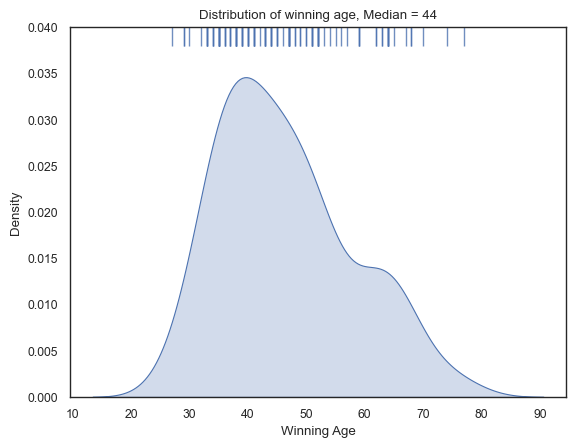

In [4]:
def upper_rugplot(data, height=.05, ax=None, **kwargs):
    from matplotlib.collections import LineCollection
    ax = ax or plt.gca()
    kwargs.setdefault("linewidth", 1)
    segs = np.stack((np.c_[data, data],
                     np.c_[np.ones_like(data), np.ones_like(data)-height]),
                    axis=-1)
    lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
    ax.add_collection(lc)

archies['winning_age'] = archies['YEAR'] - archies['DOB']
# print(pd.DataFrame(archies.winning_age.describe()).T,'')
# print(pd.DataFrame(archies[archies['GENDER'] == 'Male']['winning_age'].describe()).T)
# print(pd.DataFrame(archies[archies['GENDER'] == 'Female']['winning_age'].describe()).T)
sns.kdeplot(archies['winning_age'], fill=True)
upper_rugplot(archies['winning_age'], height=.05, alpha=.8)

plt.title('Distribution of winning age, Median = 44')
plt.ylim([0, 0.04])
plt.xlabel('Winning Age')
plt.show()

#### Winning age by year
The first line plot below shows the age of Archibald winners per year. At first glance, the winning age appears to fluctuate randomly, but there are some observable patterns prior to 1960. Upon closer examination, we discover that these gradual changes are the result of the same individuals winning the Archibald Prize multiple times. 

We list five of the most frequent Archibald winners - all of which have more than three prizes.

| Artist | Number of Archibald prizes |
| :- | -: |
| William Dargie | 8 |
| W B McInnes | 7 |
| John Longstaff | 5 |
| Ivor Hele | 5 |
| William Pidgeon | 4 |

The second line plot emphasises on these five artists, highlighting some interesting insights. 
- The first 41 years of the Archibald prize were dominated by these multi-winners, specifcally winning more than two thirds (68.3%) of Archibald wins
- W B McInnes and John Longstaff dominated the 1920-1940 period, collectively winning 12 out 19 Archibalds
- William Dargie and Ivor Hele dominated the 1940-1960 period, collectively winning 13 out 20 Archibalds
- We see a lot more distribution amongst painters in recent decades, with less occurence of repeat winners.

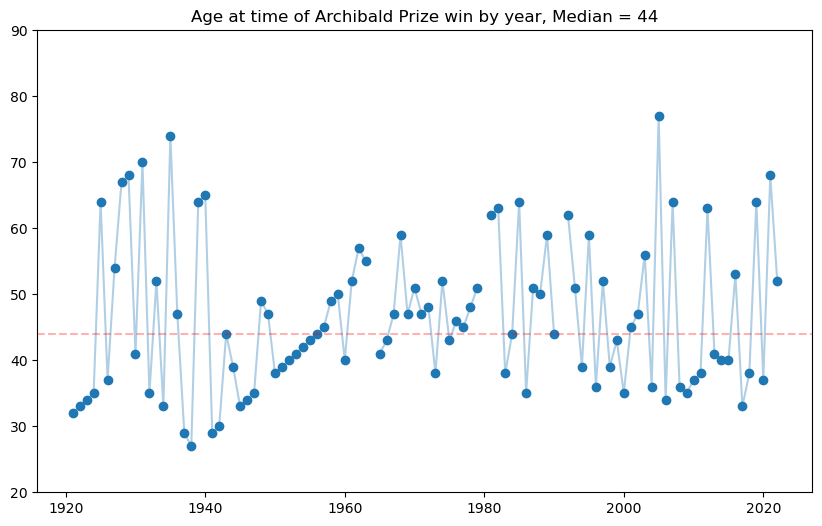

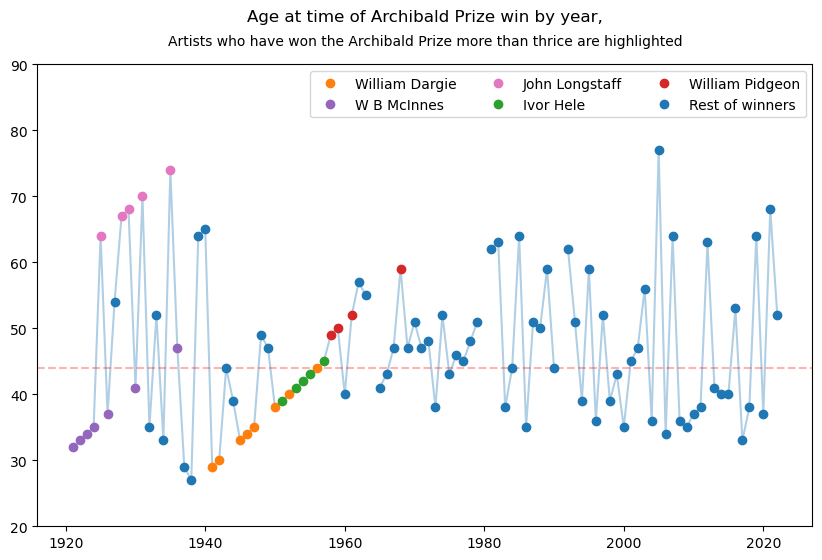

In [8]:
### plot winning age by year
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(archies['YEAR'], archies['winning_age'], alpha=0.35)
plt.plot(archies['YEAR'], archies['winning_age'], 
marker='o', linestyle='', color='tab:blue')

plt.axhline(y=44, color='red', linestyle='--', lw=1.5, alpha=0.3)

plt.ylim([20, 90])
plt.title('Age at time of Archibald Prize win by year, Median = 44')
plt.show()

############################################

### plot winning age by year and highlight multi-winners
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(archies['YEAR'], archies['winning_age'], alpha=0.35)
plt.axhline(y=44, color='red', linestyle='--', lw=1.5, alpha=0.3)

### William Dargie
cond = (archies['WINNER'] == 'William Dargie')
plt.plot(archies[cond]['YEAR'], archies[cond]['winning_age'], 
marker='o', linestyle='', color='tab:orange', label='William Dargie')

### W B McInnes
cond2 = (archies['WINNER'] == 'W B McInnes')
plt.plot(archies[cond2]['YEAR'], archies[cond2]['winning_age'], 
marker='o', linestyle='', color='tab:purple', label='W B McInnes')

### John Longstaff
cond3 = (archies['WINNER'] == 'John Longstaff')
plt.plot(archies[cond3]['YEAR'], archies[cond3]['winning_age'], 
marker='o', linestyle='', color='tab:pink', label='John Longstaff')

### Ivor Hele
cond4 = (archies['WINNER'] == 'Ivor Hele')
plt.plot(archies[cond4]['YEAR'], archies[cond4]['winning_age'], 
marker='o', linestyle='', color='tab:green', label='Ivor Hele')

### William Pidgeon
cond5 = (archies['WINNER'] == 'William Pidgeon')
plt.plot(archies[cond5]['YEAR'], archies[cond5]['winning_age'], 
marker='o', linestyle='', color='tab:red', label='William Pidgeon')

cond_rest = (archies['WINNER'] != 'William Dargie') & (archies['WINNER'] != 'W B McInnes') & \
    (archies['WINNER'] != 'John Longstaff') & (archies['WINNER'] != 'Ivor Hele') & \
    (archies['WINNER'] != 'William Pidgeon')
plt.plot(archies[cond_rest]['YEAR'], archies[cond_rest]['winning_age'], 
marker='o', linestyle='', color='tab:blue', label='Rest of winners')

# adjust legend
ax.legend(loc="upper right", ncol=3)
plt.title('Age at time of Archibald Prize win by year,\n\n')

# add subtitle
plt.text(0.5, 1.05, 'Artists who have won the Archibald Prize more than thrice are highlighted', 
horizontalalignment='center', verticalalignment='center', 
transform=ax.transAxes, fontsize=10)

plt.ylim([20, 90])
plt.show()

#### Winning age for Archibald winners (cont.)
To consider multi-winners, we assess the average winning age at different milestones in relation to the Archibald Prize (1st win, 2nd winm, etc.). The bar plot shows a similar average (43.5) for first-time winners (highlighted in orange) when compared with the overall median (44). This is likely due to the fact that most artists have only won the prize once (62 artists).

When considering second wins, the average winning age increases to 48.5, but then decreases for subsequent wins. This pattern may be a result of small sample sizes, but also suggests that multi-winners tend to experience early success. The only exception is John Longstaff, who won all his prizes after the age of 64.

Interestingly, William Dargie, who won his eighth and final Archibald Prize, was 44 years old, which is the same as the overall median winning age.

/var/folders/rb/mjsh2q916fl5sgghntjck66h0000gn/T/ipykernel_20352/2270394203.py:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx,row in archies.sort_values('YEAR')['WINNER'].iteritems():


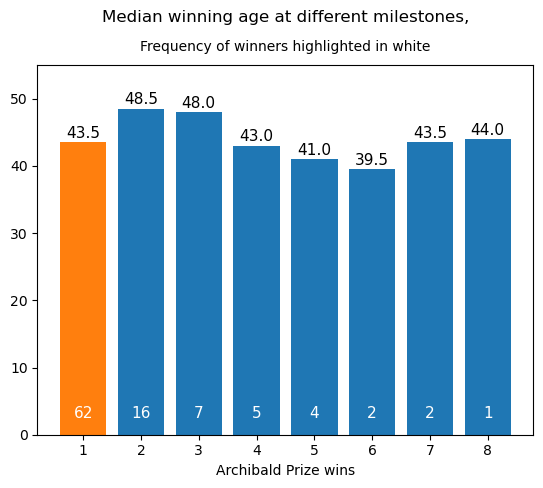

In [9]:
### plot winning age at different milestones
archies['count'] = 0

# create count for each artist
winner_count_dict = dict()
for idx,row in archies.sort_values('YEAR')['WINNER'].iteritems():
    if row not in winner_count_dict:
        archies.loc[idx,'count'] = 1
        winner_count_dict[row] = 1
    else:
        winner_count_dict[row] = winner_count_dict[row] + 1
        archies.loc[idx,'count'] = winner_count_dict[row]
        
x = [1,2,3,4,5,6,7,8]
y = [
    archies[archies['count'] == 1]['winning_age'].median(),
    archies[archies['count'] == 2]['winning_age'].median(),
    archies[archies['count'] == 3]['winning_age'].median(),
    archies[archies['count'] == 4]['winning_age'].median(),
    archies[archies['count'] == 5]['winning_age'].median(),
    archies[archies['count'] == 6]['winning_age'].median(),
    archies[archies['count'] == 7]['winning_age'].median(),
    archies[archies['count'] == 8]['winning_age'].median()
    ]

fig, ax = plt.subplots()
ax.bar(x, y)
ax.bar(x[0], y[0], color='tab:orange')
ax.set_xlabel('Archibald Prize wins')
ax.set_title('Median winning age at different milestones,\n\n')

# add subtitle
plt.text(0.5, 1.05, 'Frequency of winners highlighted in white', 
horizontalalignment='center', verticalalignment='center', 
transform=ax.transAxes, fontsize=10)

plt.ylim([0, 55])

omit_nowins = (~archies.winning_age.isnull())

for i, v in enumerate(y): 
    ax.annotate(str(v), (i+1,v*1.005), ha='center', va='bottom', size=11)
    ax.annotate(archies[(archies['count'] == i+1) & omit_nowins].shape[0], 
    (i+1,2), ha='center', va='bottom', size=11, color='white')

plt.show()

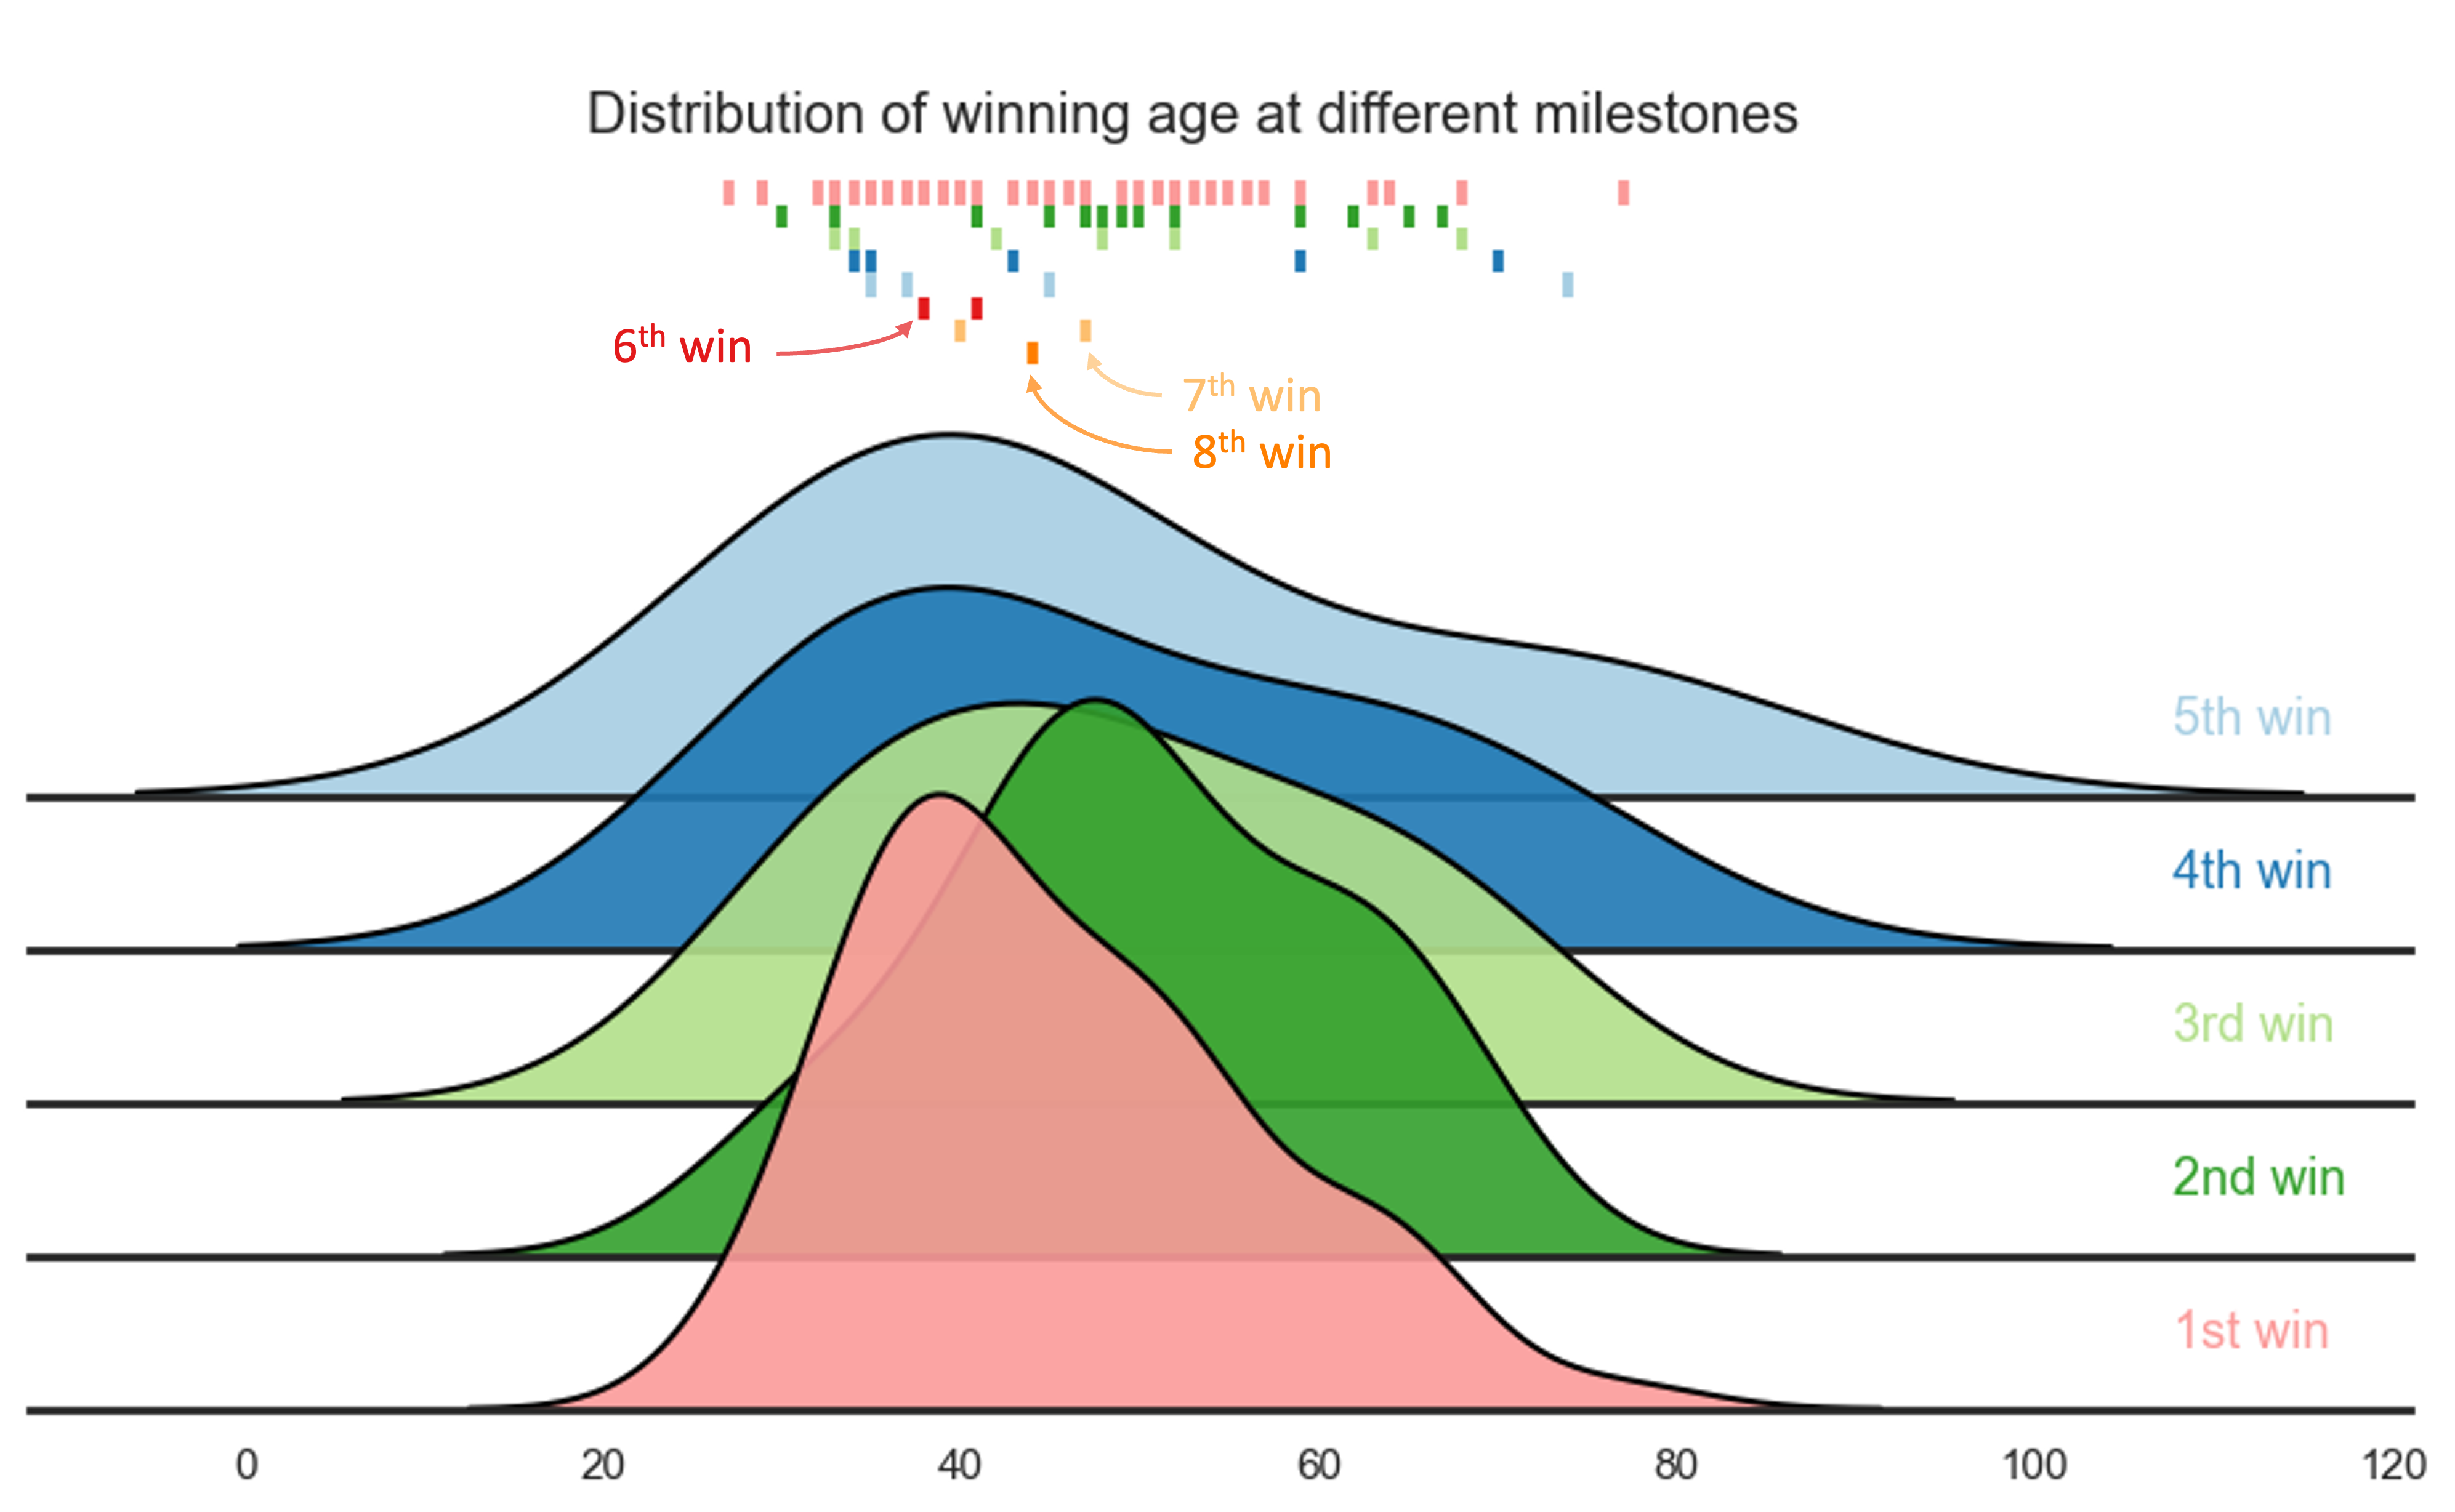

In [146]:
# def upper_rugplot(data, height=.05, ax=None, **kwargs):
#     from matplotlib.collections import LineCollection
#     ax = ax or plt.gca()
#     kwargs.setdefault("linewidth", 1)
#     segs = np.stack((np.c_[data, data],
#                      np.c_[np.ones_like(data), np.ones_like(data)-height]),
#                     axis=-1)
#     lc = LineCollection(segs, transform=ax.get_xaxis_transform(), **kwargs)
#     ax.add_collection(lc)

# sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})  
# palette = sns.color_palette("Paired", 8)    
# archies_density = archies[archies['count'] < 9].copy()  
# archies_density['count_verbose'] = np.where(archies_density['count'] == 1, '1st win', np.nan)  
# archies_density['count_verbose'] = np.where(archies_density['count'] == 2, '2nd win', archies_density['count_verbose'])  
# archies_density['count_verbose'] = np.where(archies_density['count'] == 3, '3rd win', archies_density['count_verbose'])  
# archies_density['count_verbose'] = np.where(archies_density['count'] == 4, '4th win', archies_density['count_verbose'])  
# archies_density['count_verbose'] = np.where(archies_density['count'] == 5, '5th win', archies_density['count_verbose'])  
# archies_density['count_verbose'] = pd.Categorical(archies_density['count_verbose'],   
# categories=['5th win','4th win','3rd win','2nd win','1st win'], ordered=True)    
# g = sns.FacetGrid(archies_density, palette=palette, row="count_verbose", hue="count_verbose", aspect=8, height=1.2)  
# g.map_dataframe(sns.kdeplot, x="winning_age", fill=True, alpha=0.9)  
# g.map_dataframe(sns.kdeplot, x="winning_age", color='black')    
# upper_rugplot(archies_density[archies_density['count'] == 8]['winning_age'], color=palette[7], linewidth=2.75, height=0.24, ax=g.axes[1,0])
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.21, ax=g.axes[1,0])  
# upper_rugplot(archies_density[archies_density['count'] == 7]['winning_age'], color=palette[6], linewidth=2.75, height=0.21, ax=g.axes[1,0])
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.18, ax=g.axes[1,0]) 
# upper_rugplot(archies_density[archies_density['count'] == 6]['winning_age'], color=palette[5], linewidth=2.75, height=0.18, ax=g.axes[1,0])
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.15, ax=g.axes[1,0]) 
# upper_rugplot(archies_density[archies_density['count'] == 5]['winning_age'], color=palette[0], linewidth=2.75, height=0.15, ax=g.axes[1,0])  
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.12, ax=g.axes[1,0])  
# upper_rugplot(archies_density[archies_density['count'] == 4]['winning_age'], color=palette[1], linewidth=2.75, height=.12, ax=g.axes[1,0])  
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.09, ax=g.axes[1,0])  
# upper_rugplot(archies_density[archies_density['count'] == 3]['winning_age'], color=palette[2], linewidth=2.75, height=.09, ax=g.axes[1,0])  
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.06, ax=g.axes[1,0])  
# upper_rugplot(archies_density[archies_density['count'] == 2]['winning_age'], color=palette[3], linewidth=2.75, height=.06, ax=g.axes[1,0])  
# upper_rugplot(range(25,85), color='white', linewidth=3, height=.03, ax=g.axes[1,0])  
# upper_rugplot(archies_density[archies_density['count'] == 1]['winning_age'], color=palette[4], linewidth=2.75, height=.03, ax=g.axes[1,0])    

# def label(x, color, label):      
#     ax = plt.gca()      
#     ax.text(0.9, .1, label, color=color, fontsize=13,      
#     ha="left", va="center", transform=ax.transAxes)    
    
# g.map(label, "count_verbose")  
# g.fig.subplots_adjust(hspace=-0.8)  
# g.set_titles("")  
# g.set(yticks=[], xlabel="", ylabel="", ylim=[0, 0.045])  
# g.despine( left=True)    
# plt.suptitle('Distribution of winning age at different milestones', x=0.52, y=0.9)  
# plt.show()

from IPython.display import Image
Image(filename='images/StackedDensity.png', width=800)

```{epigraph}
By the time the average participant achieves their first Archibald Prize, William Dargie had already secured his eighth Archibald win.
```

#### Winning age for Archibald winners by vicennium
By analysing the winning age data by milestone and decade, we can observe that the average winning age for first-time winners has experienced fluctuations over time. During the 1920-1940 period, the median winning age for first-time winners was 35. However, this average rose to 46.5 over the next forty years and then dropped back to 40 in the 2000s. A similar pattern was observed for second-time winners, with a peak median of 60.5 in the 1980-2000 period.

As illustrated in previous visualisations, third-time winners and beyond tend to occur more often in earlier decades. The last artist to win three Archibald prizes was Eric John Smith in 1982 at the age of 63.

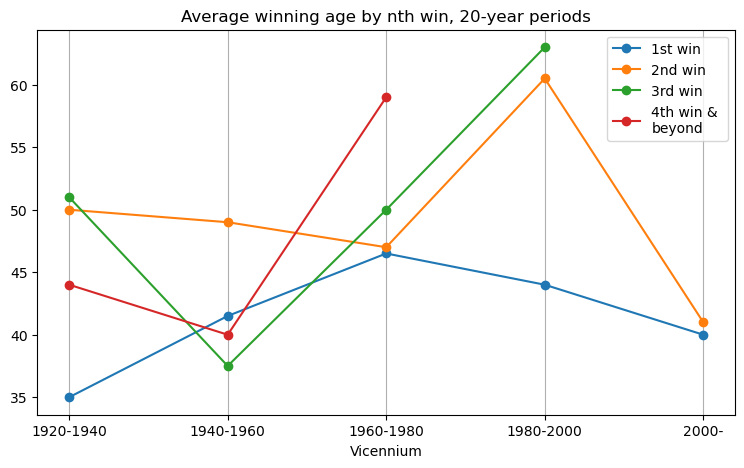

In [10]:
fig, ax = plt.subplots(figsize=(9, 5))

### groupby mean age of winners by vicennium
archies[archies['count'] == 1].groupby('year_vicennium')['winning_age'].median().reset_index().\
    plot(x='year_vicennium', y='winning_age', marker='o', ax=ax, label='1st win')
archies[archies['count'] == 2].groupby('year_vicennium')['winning_age'].median().reset_index().\
    plot(x='year_vicennium', y='winning_age', marker='o',ax=ax, label='2nd win')
archies[archies['count'] == 3].groupby('year_vicennium')['winning_age'].median().reset_index().\
    plot(x='year_vicennium', y='winning_age', marker='o',ax=ax, label='3rd win')
archies[archies['count'] > 3].groupby('year_vicennium')['winning_age'].median().reset_index().\
    plot(x='year_vicennium', y='winning_age', marker='o',ax=ax, label='4th win & \nbeyond')

ax.set(xlabel="Vicennium", ylabel="")
plt.grid(axis='x')
plt.xticks([1920,1940,1960,1980,2000], 
['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])

# plt.title('Average winning age by $\it{n}$th win, 20-year periods')
plt.title('Average winning age by nth win, 20-year periods')

# add legend 2 by 2
plt.legend(facecolor='white', loc='upper right', ncol=1)

plt.show()

### Colour and Brightness

#### Colour over time

In [11]:
# # Takes 3 minutes to run

# import matplotlib.patches as patches
# import matplotlib.image as mpimg

# from PIL import Image
# from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# # !pip install easydev                 #version 0.12.0
# # !pip install colormap                #version 1.0.4
# # !pip install opencv-python           #version 4.5.5.64
# # !pip install colorgram.py            #version 1.2.0
# # !pip install extcolors               #version 1.0.0
# # !pip install colormath               #version 3.0.0
# # !pip install webcolors               #version 1.11.1

# import cv2
# import extcolors

# from colormap import rgb2hex
# from colormath.color_objects import sRGBColor, LabColor
# from colormath.color_conversions import convert_color
# from colormath.color_diff import delta_e_cie2000
# import webcolors

# def get_closest_color(requested_color, color_map):
#     requested_color = sRGBColor(*requested_color)
#     requested_color = convert_color(requested_color, LabColor)

#     min_distance = float("inf")
#     closest_color = None
#     for color_name, color_rgb in color_map.items():
#         color = sRGBColor(*color_rgb)
#         color = convert_color(color, LabColor)
#         distance = delta_e_cie2000(requested_color, color)
#         if distance < min_distance:
#             min_distance = distance
#             closest_color = color_name

#     return closest_color

# color_map = {color_name: webcolors.name_to_rgb(color_name) for color_name in webcolors.CSS3_NAMES_TO_HEX.keys()}

# from os import listdir
# from os.path import isfile, join
# onlyfiles = [f for f in listdir('./images/ArchibaldWinners') if isfile(join('./images/ArchibaldWinners', f))]

# def color_to_df(input):
#     colors_pre_list = str(input).replace('([(','').split(', (')[0:-1]
#     df_rgb = [i.split('), ')[0] + ')' for i in colors_pre_list]
#     df_percent = [i.split('), ')[1].replace(')','') for i in colors_pre_list]
    
#     #convert RGB to HEX code
#     df_color_up = [rgb2hex(int(i.split(", ")[0].replace("(","")),
#                           int(i.split(", ")[1]),
#                           int(i.split(", ")[2].replace(")",""))) for i in df_rgb]
    
#     df = pd.DataFrame(zip(df_color_up, df_percent), columns = ['c_code','occurence'])
#     return df

# df_colors = pd.DataFrame(columns = ['c_code','occurence'])
# onlyfiles.sort()

# for f in onlyfiles:
#     colors_x = extcolors.extract_from_path('./images/ArchibaldWinners/' + f, 
#                                            tolerance = 12, limit = 25)
#     df_color = color_to_df(colors_x)
#     df_color['proportion'] = df_color['occurence'].astype(float) / df_color['occurence'].astype(float).sum()
#     df_color['rank'] = df_color['proportion'].rank(ascending=False)
#     df_color['color_name'] = df_color.c_code.\
#         apply(lambda x: get_closest_color(webcolors.hex_to_rgb(x), color_map))
#     df_color['year'] = f[:4]
#     # df_colors = df_colors.append(df_color, ignore_index=True)
#     df_colors = pd.concat([df_colors, df_color], ignore_index=True)

# df_colors.to_csv('data/Archibald_colors.csv', index=False)          

# Fetch colour data for every Archibald winning potrait
df_colors = pd.read_csv('data/Archibald_colors.csv')

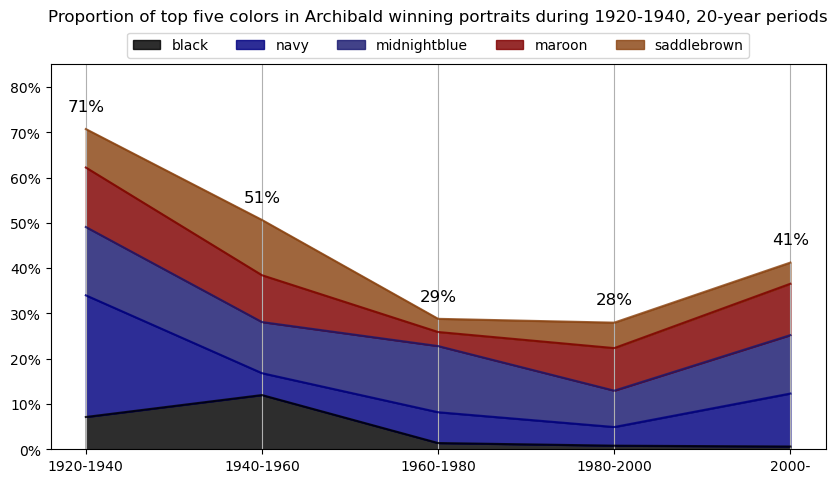

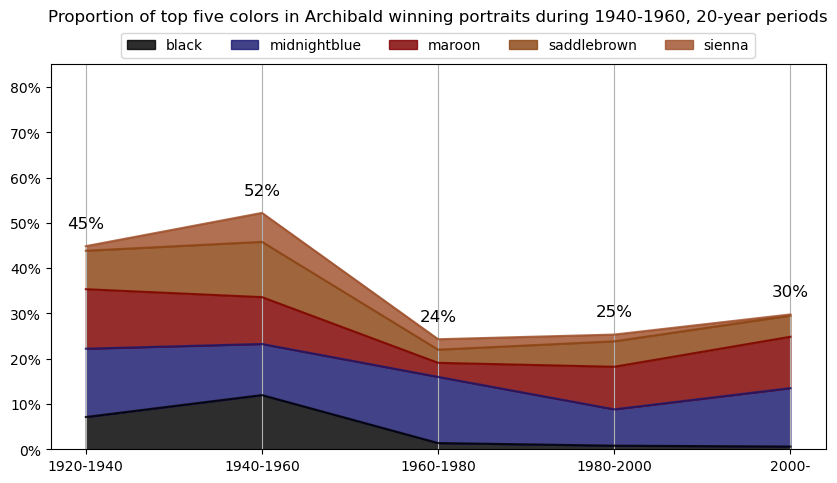

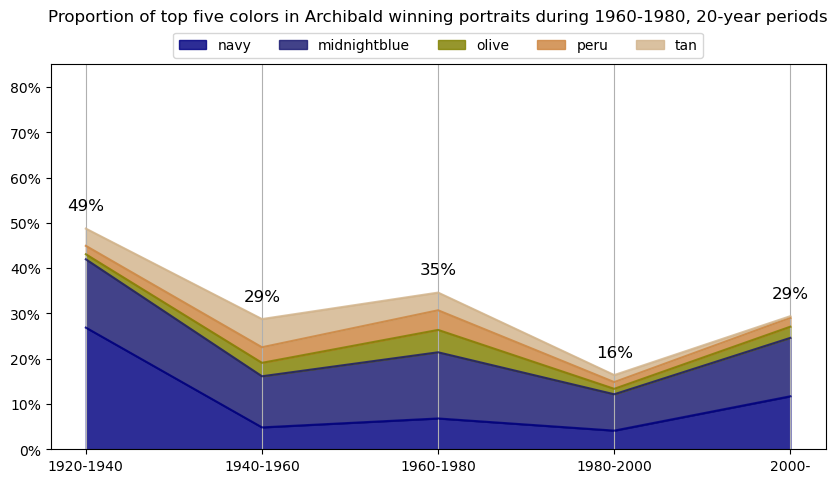

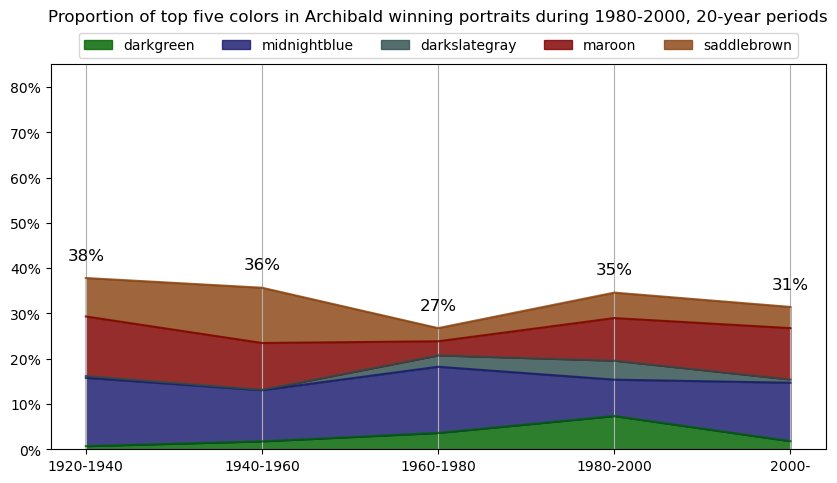

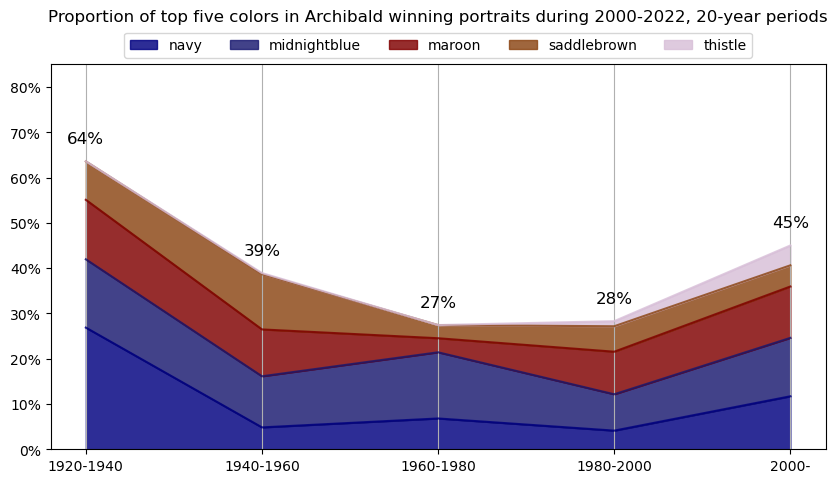

In [202]:
# create a new column for the year in 10 year intervals
df_colors['year_vicennium'] = df_colors['year'].astype(int).apply(lambda x: x - x % 20)
df_colors['year_vicennium'] = np.where(df_colors['year_vicennium'] == 2020, 2000, df_colors['year_vicennium'])

# create a new column for the proportion of colors in each year
len_20_cols = df_colors[df_colors['year_vicennium'] == 1920]['year'].nunique()
len_40_cols = df_colors[df_colors['year_vicennium'] == 1940]['year'].nunique()
len_60_cols = df_colors[df_colors['year_vicennium'] == 1960]['year'].nunique()
len_80_cols = df_colors[df_colors['year_vicennium'] == 1980]['year'].nunique()
len_00_cols = df_colors[df_colors['year_vicennium'] == 2000]['year'].nunique()
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1920, df_colors['proportion']/len_20_cols, np.nan)
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1940, df_colors['proportion']/len_40_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1960, df_colors['proportion']/len_60_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 1980, df_colors['proportion']/len_80_cols, df_colors['proportion2'])
df_colors['proportion2'] = np.where(df_colors['year_vicennium'] == 2000, df_colors['proportion']/len_00_cols, df_colors['proportion2'])

for y in df_colors['year_vicennium'].unique():
    # get the top 5 colors for each year
    top5cols = df_colors[df_colors.year_vicennium == y]\
                .groupby(['year_vicennium','color_name'])\
                .agg({'proportion2':'sum'}).reset_index()\
                .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
                .groupby('year_vicennium')\
                .head(5)['color_name'].unique()

    df_colors_top5 = df_colors[df_colors.color_name.isin(top5cols)]\
                .groupby(['year_vicennium','color_name'])\
                .agg({'proportion2':'sum'}).reset_index()\
                .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
                .groupby('year_vicennium')\
                .head(5)

    df_colors_top5_pivot = df_colors_top5\
        .pivot(index='year_vicennium', columns='color_name', values='proportion2')\
        .fillna(0)

    # create a new column for the RGB values of each color
    df_colors_top5['red'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][1:3], 16))
    df_colors_top5['green'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][3:5], 16))
    df_colors_top5['blue'] = df_colors_top5['color_name']\
        .apply(lambda x: int(CSS3_NAMES_TO_HEX[x][5:], 16))

    # Define a list of column names to order by
    ordered_columns = df_colors_top5\
        .sort_values(['red','green','blue'], ascending=[True,True,True])['color_name']\
        .unique()

    # Reorder the columns
    df_colors_top5_pivot = df_colors_top5_pivot.reindex(columns=ordered_columns)

    # plot stacked area chart
    df_colors_top5_pivot\
        .plot.area(stacked=True, figsize=(10,5), 
        color=df_colors_top5_pivot.columns, 
        alpha=0.825)

    # add labels for sum of proportions for each year
    for i,x in enumerate(df_colors_top5_pivot.index):
        plt.text(x, df_colors_top5_pivot.iloc[i].sum()+0.05,
        f'{df_colors_top5_pivot.iloc[i].sum():.0%}', 
        ha='center', va='center', fontsize=12)

    plt.legend(loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.1))

    # Set the y-axis limts
    plt.ylim(0, 0.85)

    # Set the y-axis formatter to show percentages
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

    plt.xlabel("")
    plt.grid(axis='x')
    plt.xticks([1920,1940,1960,1980,2000], 
    ['1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-'])

    if y == 2000: plus20 = 2022
    else: plus20 = y + 20
    plt.title(f'Proportion of top five colors in Archibald winning portraits during {y}-{plus20}, 20-year periods\n\n')
    
    
    plt.show()

In [406]:
# top5cols_all = pd.DataFrame()

# for y in df_colors['year_vicennium'].unique():
#     # get the top 5 colors for each year
#     top5cols = df_colors[df_colors.year_vicennium == y]\
#                 .groupby(['year_vicennium','color_name'])\
#                 .agg({'proportion2':'sum'}).reset_index()\
#                 .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
#                 .groupby('year_vicennium')\
#                 .head(5)
#     top5cols_all = top5cols_all.append(top5cols)

# # Define a list of column names to order by
# ordered_columns = top5cols_all\
#     .sort_values(['proportion2'], ascending=[False])['color_name']\
#     .unique()

# df_colors_top5_pivot = top5cols_all\
#                         .pivot(index='year_vicennium', columns='color_name', values='proportion2')\
#                         .fillna(0)

# # Reorder the columns
# df_colors_top5_pivot = df_colors_top5_pivot.reindex(columns=ordered_columns)

# # plot stacked area chart
# df_colors_top5_pivot.loc[1920:1921]\
#     .plot.bar(stacked=True, figsize=(10,5),
#     color=df_colors_top5_pivot.columns, 
#     alpha=0.825, ax=ax)

# # plot stacked area chart
# df_colors_top5_pivot.loc[1940:1941]\
#     .plot.bar(stacked=True, figsize=(10,5),
#     color=df_colors_top5_pivot.columns, 
#     alpha=0.825, ax=ax)


# plt.legend().remove()

# plt.show()


In [331]:
# from PIL import Image
# from colorspacious import cspace_converter # pip install colorspacious-1.1.2
# from matplotlib.colors import hsv_to_rgb

# sort_years = df_colors['year'].unique()

# all_H = []
# all_S = []
# all_V = []
# excl_dim1 = []
# excl_dim2 = []

# px_sample = 100

# for j,f in enumerate(onlyfiles):
#     pics = f
#     npics = len(pics)
#     image_files = []
#     img = Image.open('./images/ArchibaldWinners/' + f)
#     image_files.append(img)
#     excl_temp1 = np.sum([1 if len(np.shape(img)) != 3 else 0 for img in image_files])
#     image_files = [img for img in image_files if len(np.shape(img)) == 3]
#     excl_temp2 = np.sum([1 if np.shape(img)[2] != 3 else 0 for img in image_files])
#     image_files = [img for img in image_files if np.shape(img)[2] == 3]
#     excl_dim1.append(excl_temp1)
#     excl_dim2.append(excl_temp2)

#     H = []
#     S = []
#     V = []
#     for i, img in enumerate(image_files):
#         pixels = np.asarray(img).reshape(-1, 3) / 255
#         hsv = cspace_converter("sRGB1", "CAM02-UCS")(pixels)
#         H.append(hsv[:, 0][(hsv[:, 1] > 0.2) & (hsv[:, 2] > 0.2)])
#         if len(H[i]) < px_sample:
#             H[i] = None
#         elif len(H[i]) >= px_sample:
#             H[i] = np.random.choice(H[i], size=px_sample, replace=False)

#         S.append(hsv[:, 1])
#         if len(S[i]) < px_sample:
#             S[i] = None
#         elif len(S[i]) >= px_sample:
#             S[i] = np.random.choice(S[i], size=px_sample, replace=False)

#         V.append(hsv[:, 2])
#         if len(V[i]) < px_sample:
#             V[i] = None
#         elif len(V[i]) >= px_sample:
#             V[i] = np.random.choice(V[i], size=px_sample, replace=False)

#     all_H.append([val for sublist in H for val in sublist if sublist is not None])
#     all_S.append([val for sublist in S for val in sublist if sublist is not None])
#     all_V.append([val for sublist in V for val in sublist if sublist is not None])

# na_H = np.apply_along_axis(lambda x: np.sum(np.isnan(x)), axis=1, arr=all_H)
# np.sum(na_H)
# np.sum(excl_dim1)
# np.sum(excl_dim2)

# # all_H = [x[~np.isnan(x)] for x in all_H]
# n_pics = np.array([len(x)/px_sample for x in all_H])

# # Some additional sorting of the values
# new_n_pics = np.zeros(max(sort_years))
# new_n_pics[sort_years-1] = n_pics
# new_n_pics = new_n_pics[min(sort_years)-1:max(sort_years)-1]

# new_H = [None] * max(sort_years)
# for i, year in enumerate(sort_years):
#     new_H[year-1] = all_H[i]
# new_H = new_H[min(sort_years)-1:max(sort_years)-1]
# # new_H = [x[~np.isnan(x)] for x in new_H]

# new_H = dict(enumerate(new_H))
# new_H[43] = None
# new_H[101] = None
# # new_H = {k: v for k, v in new_H.items() if v is not None}

# # Set the margin of the plot
# plt.subplots_adjust(left=0.2, bottom=0.15)

# # Create the plot
# plt.plot(np.arange(len(range(1921, 2023))), np.zeros(len(range(1921, 2023))),
#          color='white', marker='', linestyle='', linewidth=0, antialiased=False)

# # Set the x-axis ticks and labels
# ticks = np.where(np.isin(range(1921, 2023), np.arange(1921, 2023, 10)))[0]
# plt.xticks(ticks, np.arange(1921, 2023, 10), fontsize=12, rotation=90)
# plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

# # Draw the colored rectangles
# for k in range(len(np.where(np.isin(range(1921, 2023), np.arange(min(sort_years), max(sort_years) + 1)))[0])):
#     idx = np.where(np.isin(range(1921, 2023), np.arange(min(sort_years), max(sort_years) + 1)))[0][k]

#     if new_H[idx] is None:
#         new_H[idx] = new_H[idx-1]

#     if len(new_H[idx]) > 0:
#         tempc = np.sort(new_H[idx])
#         tempc = np.concatenate((tempc[tempc > 280], tempc[tempc <= 280]))
#         colors = np.array([hsv_to_rgb((c / 360, 0.8, 0.8)) for c in tempc])
#         plt.fill_between([k - 0.5, k + 0.5], 0, len(range(1800, 2001)),
#                          facecolor=colors, edgecolor='none')

# # Calculate the sum of the lengths of the newH arrays
# n_haploids = sum([len(new_H[i]) for i in np.where(np.isin(range(1921, 2023), np.arange(min(sort_years), max(sort_years) + 1)))[0]]) / px_sample

# plt.show()

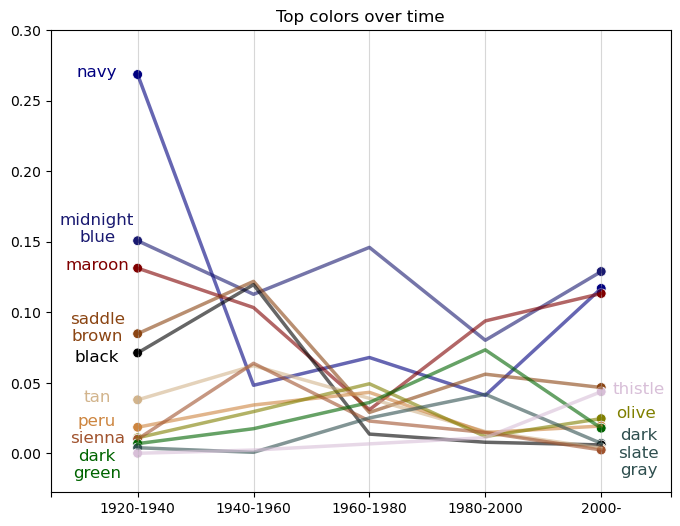

In [374]:
top30cols = df_colors\
            .groupby(['year_vicennium','color_name'])\
            .agg({'proportion2':'sum'}).reset_index()\
            .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
            .groupby('year_vicennium')\
            .head(5)['color_name'].unique()

top30cols_df = df_colors[df_colors.color_name.isin(top30cols)]\
                .groupby(['year_vicennium','color_name'])\
                .agg({'proportion2':'sum'}).reset_index()\
                .sort_values(['year_vicennium','proportion2'], ascending=[True,False])\
                .groupby('year_vicennium')\
                .head(100)

# plot the top 30 colors for each year as time series
fig, ax = plt.subplots(figsize=(8,6))

# line plot with markers at start and end of each line
sns.lineplot(x='year_vicennium', y='proportion2', hue='color_name', data=top30cols_df,
palette=sns.color_palette(top30cols_df.color_name.unique(), len(top30cols)), ax=ax,
alpha=0.6, linewidth=2.5)

# plot start and end markers
sns.scatterplot(x='year_vicennium', y='proportion2', hue='color_name', 
data=top30cols_df[(top30cols_df.year_vicennium == 1920) | (top30cols_df.year_vicennium == 2000)],
palette=sns.color_palette(top30cols_df.color_name.unique(), len(top30cols)), ax=ax,
s=50, marker='o', legend=False)

# no legend 
ax.legend().remove()
ax.set_title('Top colours over time')
ax.set_xlabel('')
ax.set_ylabel('')

plt.grid(axis='x', alpha=0.5)
plt.ylim(-.0275, 0.3)
plt.xticks([1905, 1920,1940,1960,1980,2000, 2012], 
['','1920-1940', '1940-1960', '1960-1980','1980-2000', '2000-',''])

# add annotation of color_name for each marker
ax.annotate('navy', (1913, 0.257), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='navy')
ax.annotate('midnight\nblue', (1913, 0.14), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='midnightblue')
ax.annotate('maroon', (1913, 0.12), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='maroon')
ax.annotate('saddle\nbrown', (1913, 0.07), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='saddlebrown')
ax.annotate('black', (1913, 0.055), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='black')
ax.annotate('olive', (2006, 0.015), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='olive')
ax.annotate('dark\ngreen', (1913, -0.0275), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='darkgreen')
ax.annotate('peru', (1913, 0.01), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='peru')
ax.annotate('tan', (1913, 0.027), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='tan')
ax.annotate('sienna', (1913, -.0025), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='sienna')
ax.annotate('thistle', (2006.5, 0.0325), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='thistle')
ax.annotate('dark\nslate\ngray', (2006.5, -0.025), textcoords="offset points", xytext=(0,10), ha='center', size=12, color='darkslategray')

# show plot
plt.show()

#### Brightness over time

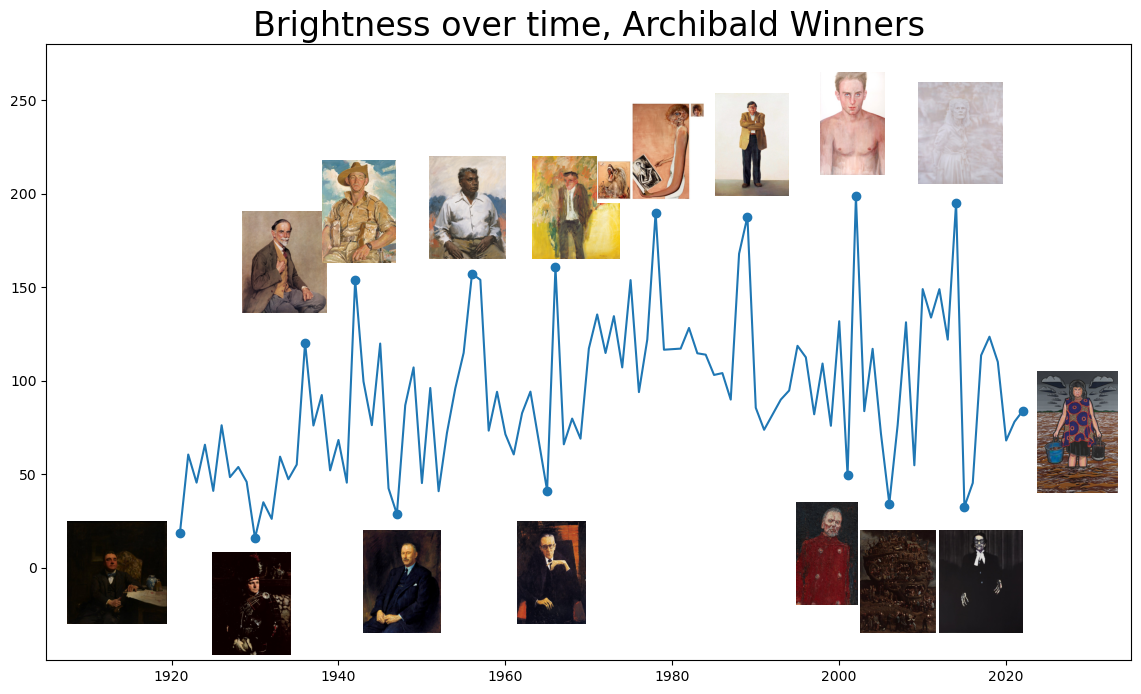

In [407]:
# def brightness( im_file ):
#     im = Image.open(im_file)
#     stat = Stat(im)
#     r,g,b = stat.mean
#     return math.sqrt(0.299*(r**2) + 0.587*(g**2) + 0.114*(b**2))

# onlyfiles = [f for f in listdir('./images/ArchibaldWinners') if isfile(join('./images/ArchibaldWinners', f))]

# # sort image files in decade dictionary
# images_df = pd.DataFrame(onlyfiles)
# images_df['year'] = images_df[0].apply(lambda x: int(x.split('_')[0]))
# images_df.loc[images_df[0] == '1990_SID78808M.jpg.641x900_q85.jpg','year'] = 1991
# images_df['decade'] = [ int(np.floor(int(year)/10) * 10) 
#                        for year in np.array(images_df["year"])]
# images_df['brightness'] = images_df[0].apply(lambda x: brightness('./images/ArchibaldWinners/' + x))

# # create figure
# fig = plt.figure(figsize=(14, 8))
# ax = plt.axes()

# peaks = images_df[images_df['year'].isin([1921,1930,1936,1942,1947,1956,
#                                           1965, 1966,1978,1989,
#                                           2001,2002,2006,2014,2015,2022])]

# ax.plot(images_df.sort_values('year')['year'],
#        images_df.sort_values('year')['brightness'])

# ax.plot(peaks.sort_values('year')['year'],
#         peaks.sort_values('year')['brightness'], "o", color='#1f77b4')

# # Draw image
# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1936].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1926,136,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1942].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1935,163,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1956].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1948,165,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/'+ \
#                        images_df[images_df.year == 1966].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1961,165,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1989].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1982,199,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1978].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1970,195,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2002].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1994,210,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2014].iloc[0][0], format='jpg')
# axin = ax.inset_axes([2007,205,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1921].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1906,-30,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2022].iloc[0][0], format='jpg')
# axin = ax.inset_axes([2021,40,15,65],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')


# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1930].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1922,-46.5,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1947].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1940,-35,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 1965].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1958,-30,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2001].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1991,-20,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2006].iloc[0][0], format='jpg')
# axin = ax.inset_axes([1999.5,-35,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# arr_image = plt.imread('./images/ArchibaldWinners/' + \
#                        images_df[images_df.year == 2015].iloc[0][0], format='jpg')
# axin = ax.inset_axes([2009.5,-35,15,55],transform=ax.transData)    # create new inset axes in data coordinates
# axin.imshow(arr_image)
# axin.axis('off')

# for tick in ax.xaxis.get_major_ticks(): tick.label1.set_fontsize(14)
# for tick in ax.yaxis.get_major_ticks(): tick.label1.set_fontsize(14)

# plt.title('Brightness over time, Archibald Winners', size=18)
# ax.set_ylim([-49.5, 280])
# ax.set_xlim([1905, 2035])
# plt.show()

from IPython.display import Image
Image(filename='images/Brightness_python.png')

### Participation

In [776]:
archies

YEAR              WINNER  GENDER     DOB     DOD  Unnamed: 5  \
0    1921         W B McInnes    Male  1889.0  1939.0          32   
1    1922         W B McInnes    Male  1889.0  1939.0          33   
2    1923         W B McInnes    Male  1889.0  1939.0          34   
3    1924         W B McInnes    Male  1889.0  1939.0          35   
4    1925      John Longstaff    Male  1861.0  1941.0          64   
..    ...                 ...     ...     ...     ...         ...   
97   2018  Yvette Coppersmith  Female  1980.0     NaN          38   
98   2019          Tony Costa    Male  1955.0     NaN          64   
99   2020   Vincent Namatjira    Male  1983.0     NaN          37   
100  2021        Peter Wegner    Male  1953.0     NaN          68   
101  2022        Blak Douglas    Male  1970.0     NaN          52   

                          PORTRAIT TITLE                  Sitter   DOB.1  \
0                        Desbrowe Annear  Harold Desbrowe-Annear  1865.0   
1               Professor Harrison Moore  William Harrison Moore  1867.0   
2                     Portrait of a lady          Violet McInnes  1892.0   
3                           Miss Collins  Gladys Neville Collins  1890.0   
4                     Maurice Moscovitch      Maurice Moscovitch  1871.0   
..                                   ...                     ...     ...   
97   Self-portrait, after George Lambert      Yvette Coppersmith  1980.0   
98                             Lindy Lee               Lindy Lee  1954.0   
99          Stand strong for who you are             Adam Goodes  1980.0   
100        Portrait of Guy Warren at 100              Guy Warren  1921.0   
101                         Moby Dickens           Karla Dickens  1967.0   

     Sitter Age  Self PORTRAIT GENDER  \
0          56.0     0            Male   
1          55.0     0            Male   
2          31.0     0          Female   
3          34.0     0          Female   
4          54.0     0            Male   
..          ...   ...             ...   
97         38.0     1          Female   
98         65.0     0          Female   
99         40.0     0            Male   
100       100.0     0            Male   
101        55.0     0          Female   

                             PORTRAIT OCC (Copy/Paste) OCC. CATEGORY (1)  \
0                                                  NaN         Architect   
1    constitutional lawyer and dean of the law facu...         Professor   
2                                 wife, Violet McInnes              Wife   
3         socialite, daughter of Joseph Thomas Collins         Socialite   
4                                   Russian-born actor             Actor   
..                                                 ...               ...   
97                                                 NaN     Self Portrait   
98                           artist and a Zen Buddhist            Artist   
99                                         Adam Goodes            Sports   
100                                  artist Guy Warren            Artist   
101                                   Wiradjuri artist            Artist   

    OCC. CATEGORY (2)                                           ANZSCO_1  \
0           Architect  Design, Engineering, Science and Transport Pro...   
1           Professor                            Education Professionals   
2              Person                                      Uncategorised   
3              Person                                      Uncategorised   
4               Actor                       Arts and Media Professionals   
..                ...                                                ...   
97             Artist                       Arts and Media Professionals   
98             Artist                       Arts and Media Professionals   
99             Sports                Sports and Personal Service Workers   
100            Artist                       Arts and Media Professionals   
101            Artist

In [5]:
import warnings
warnings.filterwarnings("ignore")
participants_by_name = pd.read_csv('data/allparticipants_byyear.csv', index_col=0)

artist_df = pd.DataFrame()

for winner in archies.sort_values('winning_age')['WINNER'].unique():
    if (winner == '–') | (pd.isnull(winner)): continue

    artist_dict = dict()
    w_df = archies[archies['WINNER'] == winner]
    p_df = participants_by_name[participants_by_name['1'] == winner]
    
    dob,dod = w_df['DOB'].values[0],w_df['DOD'].values[0]
    artist_dict[0] = 0 #dob
    
    if pd.isnull(dod): dod = 2023
    
    for yr in range(int(dob)+1,int(dod)):
        if len(w_df[w_df['YEAR'] == yr]): artist_dict[yr-dob] = 3
        elif len(p_df[p_df['Year'] == yr]): artist_dict[yr-dob] = 2
        else: artist_dict[yr-dob] = 1
    
    if (artist_dict[yr-dob] == 1) & (dod != 2023): artist_dict[dod-dob] = 0 #dod
    
    # if winner == 'Peter Wegner': break
    
    artist_dict_df = pd.DataFrame(artist_dict.values(), columns=[winner]).T
    artist_df = artist_df.append(artist_dict_df)

    # artist_df.to_csv('archies_participants_wide.csv')

artist_stats = []

for x in range(artist_df.shape[0]):
    aa = artist_df.iloc[x:x+1].T
    first = aa[aa[aa.columns[0]] > 1][aa.columns[0]].head(1).index[0]
    last = aa[aa[aa.columns[0]] > 1][aa.columns[0]].tail(1).index[0]
    
    artist_stats.append([aa.columns[0], first, last])
    
artist_stats = pd.DataFrame(artist_stats)
artist_stats['diff'] = artist_stats[2] - artist_stats[1]

#### Participation over time

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

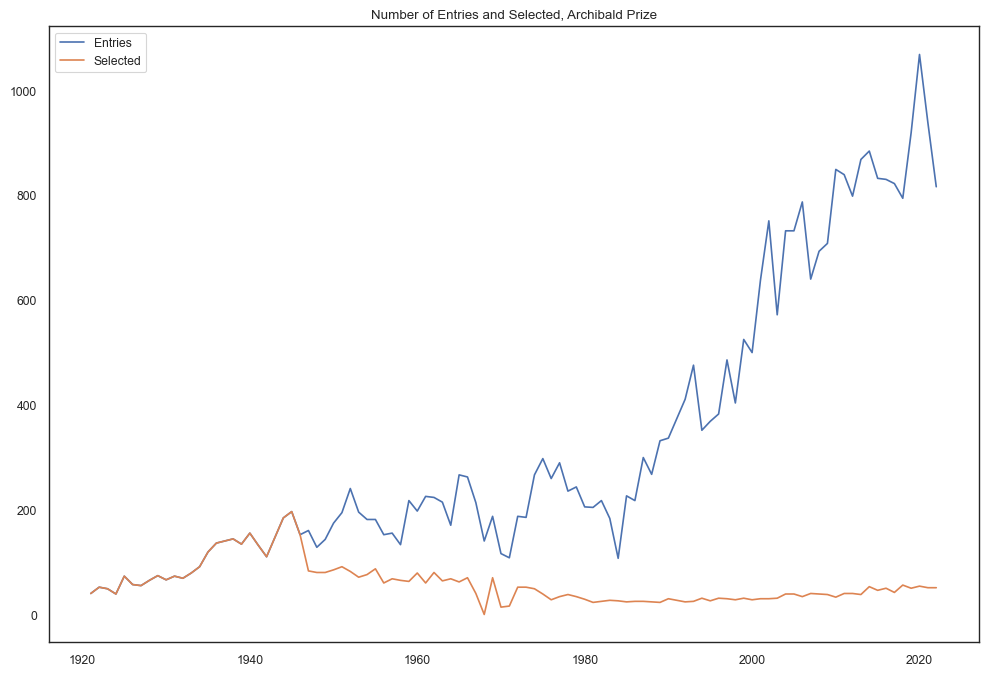

In [732]:
no_participants = pd.read_csv('data/no_participants_new.csv')

fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

ax.plot(no_participants.sort_values('Year')['Year'],
       no_participants.sort_values('Year')['Entries'], label="Entries")

ax.plot(no_participants.sort_values('Year')['Year'],
       no_participants.sort_values('Year')['Selected'], label="Selected")

# plt.axvspan(1981, 1986, alpha=0.1, color='orange')
# plt.text(1982.5, 1060, 'Katies', ha='center', va='center',size=12, rotation=90)

# plt.axvspan(1986, 1988, alpha=0.1, color='yellow')
# plt.text(1987.25, 1000, 'Grace Brothers', ha='center', va='center',size=12, rotation=90)

# plt.axvspan(1988, 1992, alpha=0.1, color='green')
# plt.text(1989.5, 1000, 'Coles Myer Ltd', ha='center', va='center',size=12, rotation=90)

# plt.axvspan(1992, 2006, alpha=0.1, color='red')
# plt.text(1994.5, 890, 'State Bank/  Colonial Group', ha='center', va='center',
#          size=12, rotation=90)

# plt.axvspan(2006, 2009, alpha=0.1, color='green')
# plt.text(2007.5, 1080, 'Myer', ha='center', va='center',size=12,rotation=90)

# plt.axvspan(2009, 2023, alpha=0.1, color='blue')
# plt.text(2010.5, 1080, 'ANZ', ha='center', va='center',size=12,rotation=90)


plt.title('Number of Entries and Selected, Archibald Prize')
plt.legend()
plt.show()

# from IPython.display import Image
# Image(filename='images/participationrates_python.png')

#### Prize Money

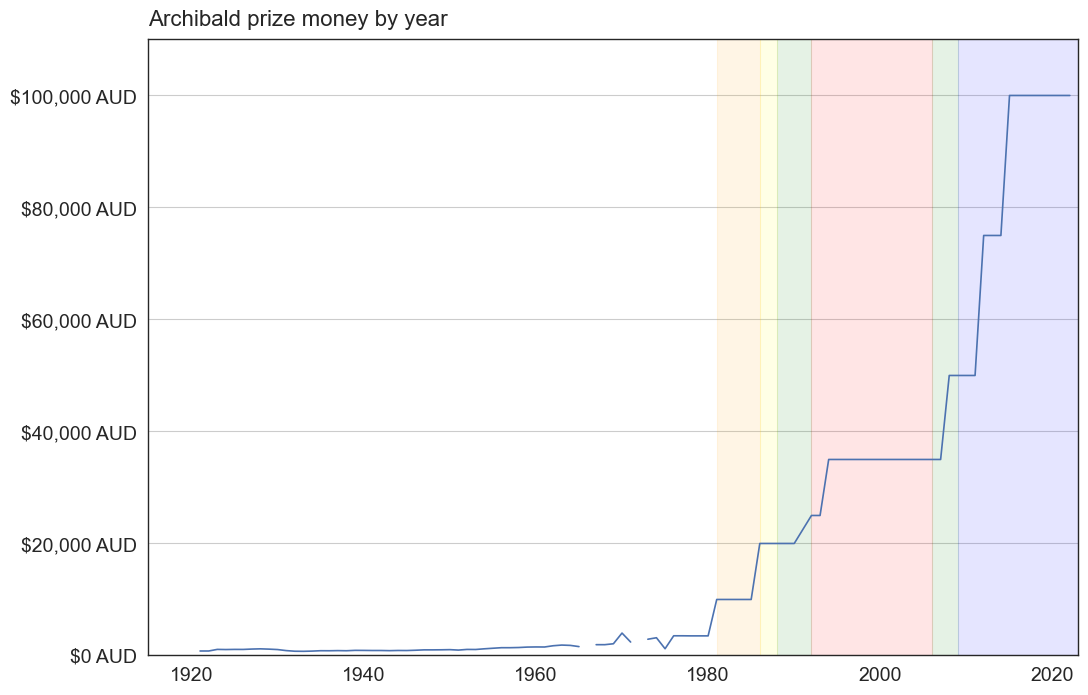

In [771]:
prize_money = pd.read_csv('data/Archibald_PrizeMoney2.csv', index_col=0)

plt.figure(figsize=(12, 8))

# Set the x-axis to the year column
x = prize_money.index

# Set the y-axis to the value column
y = prize_money['AUD_Equivalent']

# Create a line plot of the data
plt.plot(x, y)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald prize money by year', size=16, pad=10, loc='left')

plt.axvspan(1981, 1986, alpha=0.1, color='orange')
# plt.text(1982.5, 103500, 'Katies', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1986, 1988, alpha=0.1, color='yellow')
# plt.text(1987.25, 96000, 'Grace Brothers', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1988, 1992, alpha=0.1, color='green')
# plt.text(1989.5, 96000, 'Coles Myer Ltd', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1992, 2006, alpha=0.1, color='red')
# plt.text(1994.5, 85000, 'State Bank/  Colonial Group', ha='center', va='center',
#          size=14, rotation=90)

plt.axvspan(2006, 2009, alpha=0.1, color='green')
# plt.text(2007.5, 105000, 'Myer', ha='center', va='center',size=14,rotation=90)

plt.axvspan(2009, 2023, alpha=0.1, color='blue')
# plt.text(2010.5, 105000, 'ANZ', ha='center', va='center',size=14,rotation=90)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1915,2023)

plt.grid(axis='y')

# save figure
plt.savefig('prize_money.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

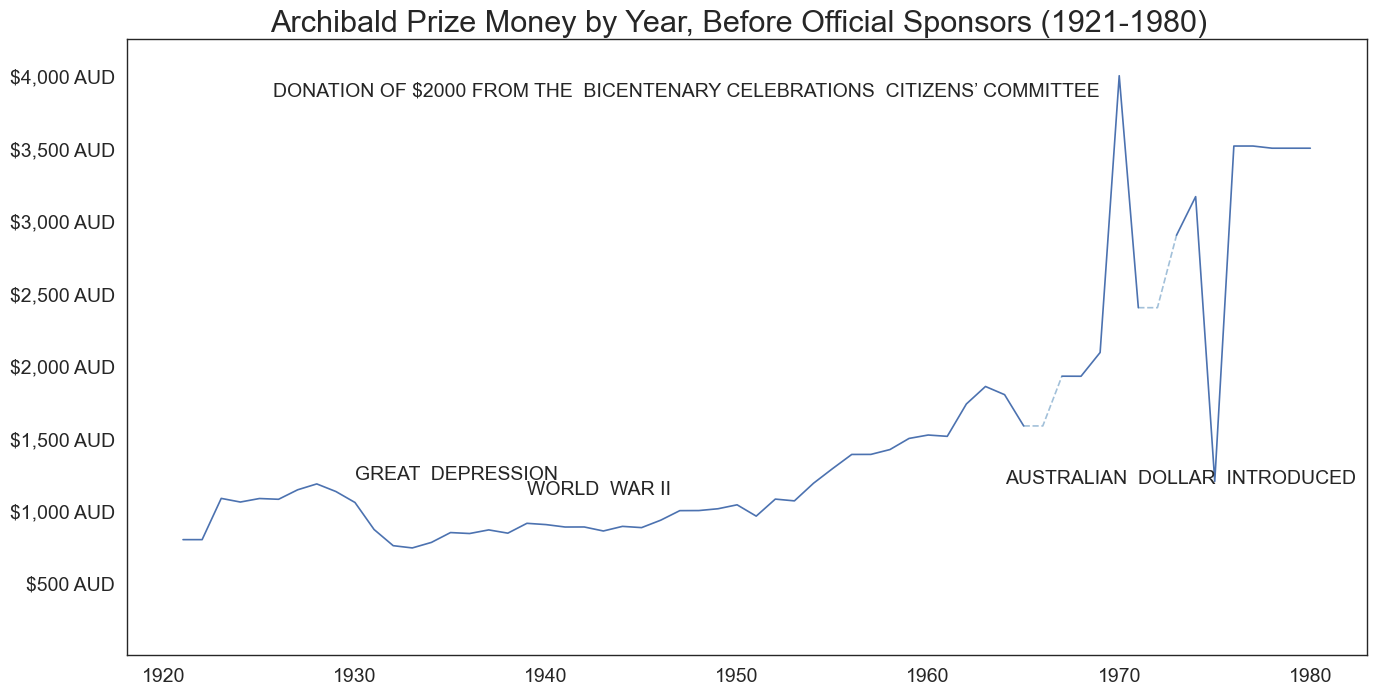

In [734]:
plt.figure(figsize=(16, 8))

missing_cond = (prize_money.index > 1964) & (prize_money.index < 1968)
missing_cond2 = (prize_money.index > 1970) & (prize_money.index < 1974)

# Set the x-axis to the year column
x = prize_money[prize_money.index < 1981].index
x2 = prize_money[missing_cond].index
x3 = prize_money[missing_cond2].index

# Set the y-axis to the value column
y = prize_money[prize_money.index < 1981]['AUD_Equivalent']
y2 = prize_money[missing_cond]['AUD_Equivalent'].ffill()
y3 = prize_money[missing_cond2]['AUD_Equivalent'].ffill()

# Create a line plot of the data
plt.plot(x, y)
plt.plot(x2, y2, linestyle='dashed',color='steelblue',alpha=0.5)
plt.plot(x3, y3, linestyle='dashed',color='steelblue',alpha=0.5)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald Prize Money by Year, Before Official Sponsors (1921-1980)  ', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.text(1930, 1250, 'GREAT  DEPRESSION', ha='left', va='center',size=14)
plt.text(1939, 1150, 'WORLD  WAR II', ha='left', va='center',size=14)
plt.text(1964, 1225, 'AUSTRALIAN  DOLLAR  INTRODUCED', ha='left', va='center',size=14)
plt.text(1969, 3900, 'DONATION OF $2000 FROM THE  BICENTENARY CELEBRATIONS  CITIZENS’ COMMITTEE', ha='right', va='center',size=14)

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(1,4250)

# Show the plot
plt.show()

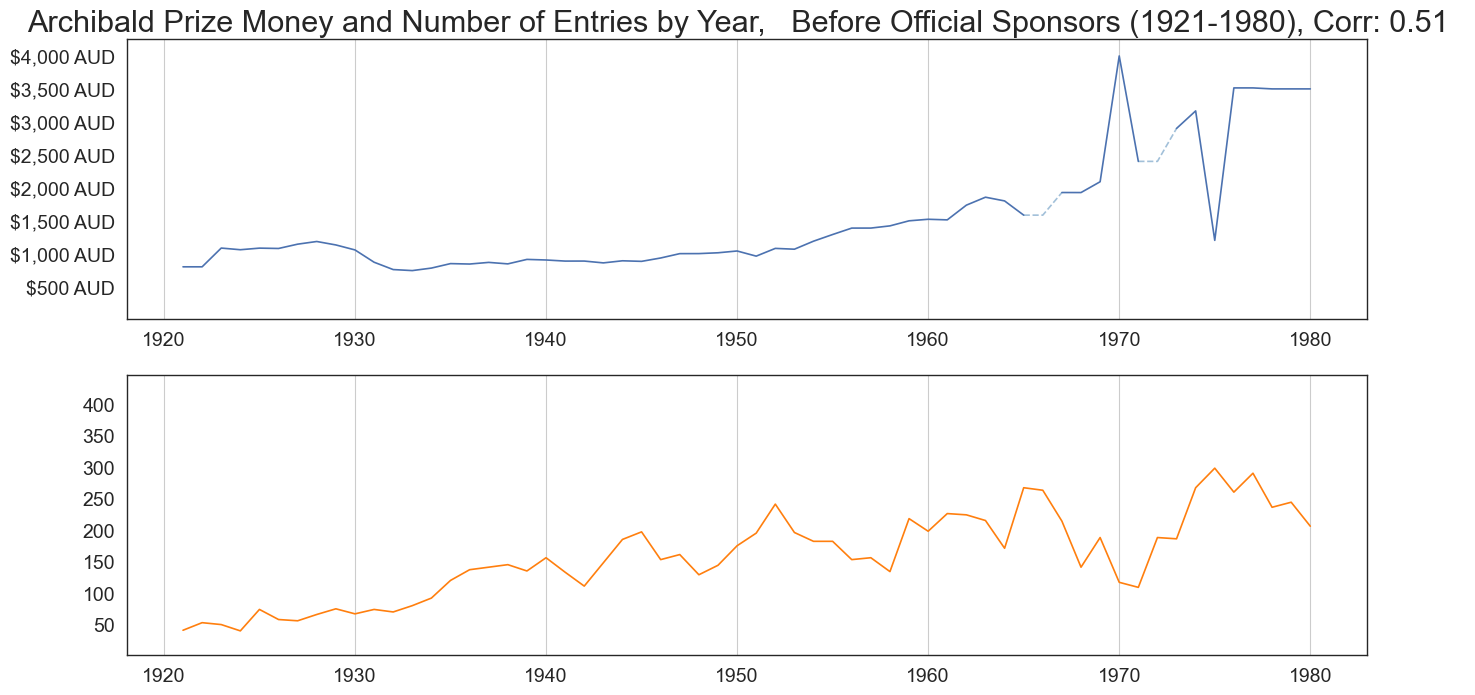

In [735]:
no_participants = pd.read_csv('data/no_participants_new.csv', index_col=0)

plt.figure(figsize=(16, 8))

missing_cond = (prize_money.index > 1964) & (prize_money.index < 1968)
missing_cond2 = (prize_money.index > 1970) & (prize_money.index < 1974)

# Set the x-axis to the year column
x = prize_money[prize_money.index < 1981].index
x2 = prize_money[missing_cond].index
x3 = prize_money[missing_cond2].index
x4 = no_participants[no_participants.Year < 1981]['Year']

# Set the y-axis to the value column
y = prize_money[prize_money.index < 1981]['AUD_Equivalent']
y2 = prize_money[missing_cond]['AUD_Equivalent'].ffill()
y3 = prize_money[missing_cond2]['AUD_Equivalent'].ffill()
y4 = no_participants[no_participants.Year < 1981]['Entries']

ax = plt.subplot(2, 1, 1)
# Create a line plot of the data
ax.plot(x, y)
ax.plot(x2, y2, linestyle='dashed',color='steelblue',alpha=0.5)
ax.plot(x3, y3, linestyle='dashed',color='steelblue',alpha=0.5)

beforesponsors = pd.merge(no_participants[no_participants.Year < 1981], 
                          prize_money[prize_money.index < 1981].reset_index())

cor = beforesponsors['Entries'].corr(beforesponsors['AUD_Equivalent']).round(2)

# Add labels and a title
plt.xlabel('')
plt.title(f'Archibald Prize Money and Number of Entries by Year,   Before Official Sponsors (1921-1980), Corr: {cor}  ', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(1,4250)
plt.grid(axis='x')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(x4, y4, color = 'tab:orange')

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(1,445)
plt.grid(axis='x')

# Show the plot
plt.show()

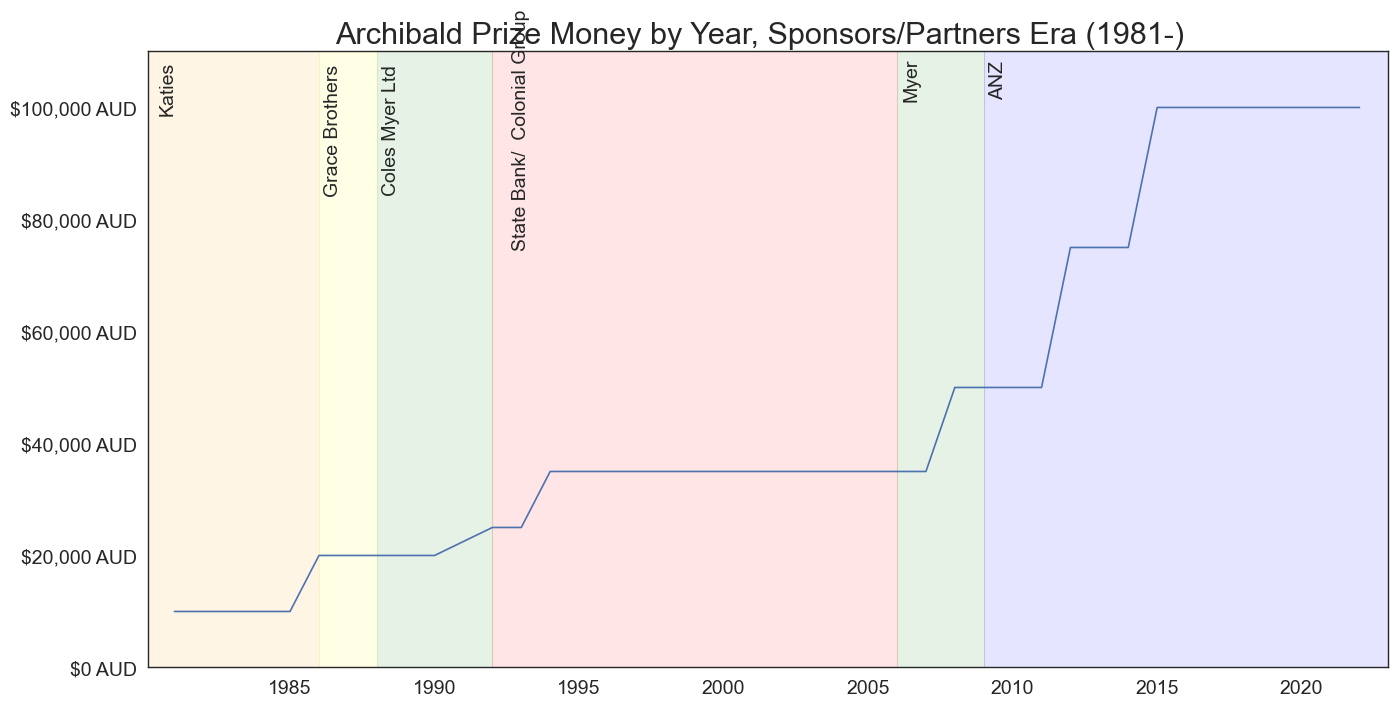

In [736]:
plt.figure(figsize=(16, 8))

# Set the x-axis to the year column
x = prize_money[prize_money.index >= 1981].index
# Set the y-axis to the value column
y = prize_money[prize_money.index >= 1981]['AUD_Equivalent']

# Create a line plot of the data
plt.plot(x, y)

# Add labels and a title
plt.xlabel('')
plt.title('Archibald Prize Money by Year, Sponsors/Partners Era (1981-)  ', size=22)

plt.axvspan(1980, 1986, alpha=0.1, color='orange')
plt.text(1980.75, 103500, 'Katies', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1986, 1988, alpha=0.1, color='yellow')
plt.text(1986.5, 96000, 'Grace Brothers', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1988, 1992, alpha=0.1, color='green')
plt.text(1988.5, 96000, 'Coles Myer Ltd', ha='center', va='center',size=14, rotation=90)

plt.axvspan(1992, 2006, alpha=0.1, color='red')
plt.text(1993, 96000, 'State Bank/  Colonial Group', ha='center', va='center',
         size=14, rotation=90)

plt.axvspan(2006, 2009, alpha=0.1, color='green')
plt.text(2006.5, 105000, 'Myer', ha='center', va='center',size=14,rotation=90)

plt.axvspan(2009, 2023, alpha=0.1, color='blue')
plt.text(2009.5, 105000, 'ANZ', ha='center', va='center',size=14,rotation=90)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1980.1,2023)

# Show the plot
plt.show()

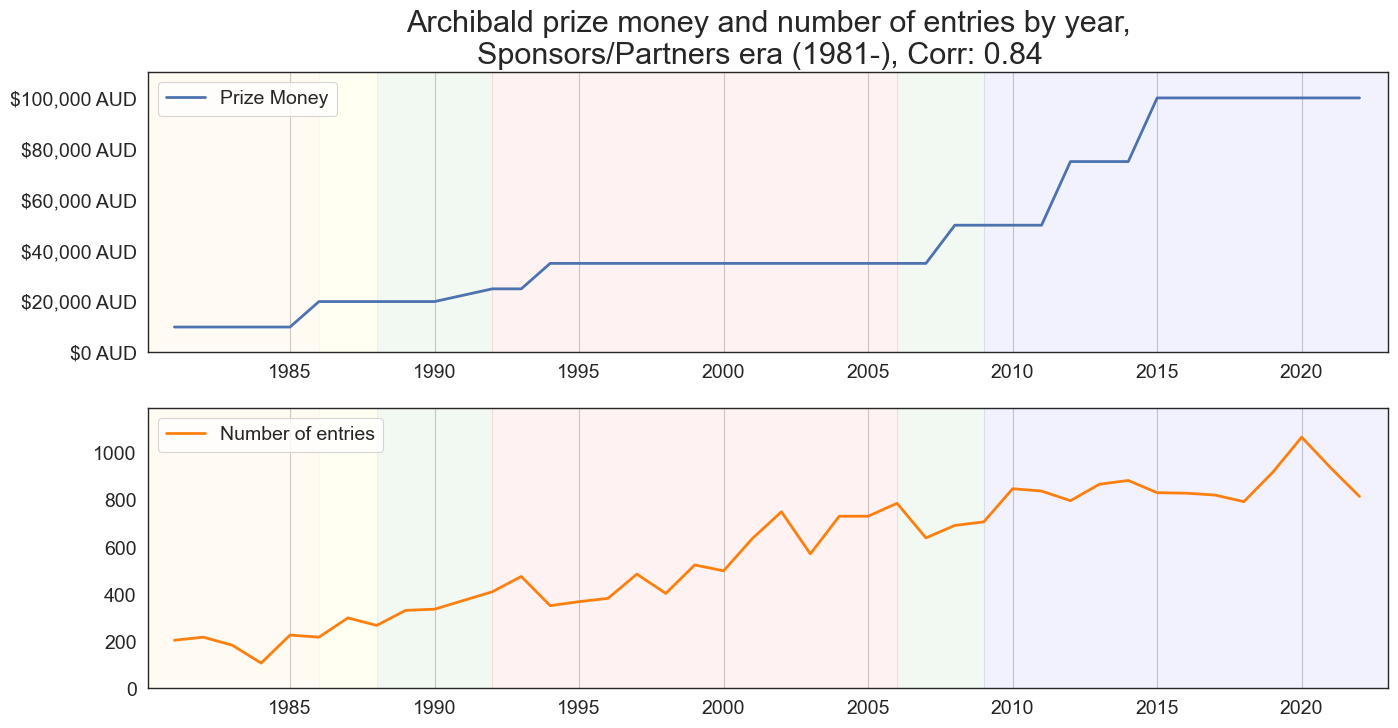

In [757]:
plt.figure(figsize=(16, 8))

# Set the x-axis to the year column
x = prize_money[prize_money.index >= 1981].index
x2 = no_participants[no_participants.Year >= 1981]['Year']

# Set the y-axis to the value column
y = prize_money[prize_money.index >= 1981]['AUD_Equivalent']
y2 = no_participants[no_participants.Year >= 1981]['Entries']


# Create a line plot of the data
ax = plt.subplot(2, 1, 1)
ax.plot(x, y, lw= 2, label='Prize Money')

plt.axvspan(1980, 1986, alpha=0.05, color='orange')
plt.axvspan(1986, 1988, alpha=0.05, color='yellow')
plt.axvspan(1988, 1992, alpha=0.05, color='green')
plt.axvspan(1992, 2006, alpha=0.05, color='red')
plt.axvspan(2006, 2009, alpha=0.05, color='green')
plt.axvspan(2009, 2023, alpha=0.05, color='blue')

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)

plt.ylim(0,110000)
plt.xlim(1980.1,2023)

beforesponsors = pd.merge(no_participants[no_participants.Year >= 1981], 
                          prize_money[prize_money.index >= 1981].reset_index())

cor = beforesponsors['Entries'].corr(beforesponsors['AUD_Equivalent']).round(2)

# Add labels and a title
plt.xlabel('')
plt.title(f'Archibald prize money and number of entries by year,\nSponsors/Partners era (1981-), Corr: {cor}  ', size=22)

# Format the y-axis labels as a monetary amount
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f} AUD'))

plt.yticks(size=14)
plt.xticks(size=14)
plt.grid(axis='x')

# add y-axis label, change angle
plt.legend(title='', loc='upper left', fontsize=14)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(x2, y2, color = 'tab:orange', lw= 2, label='Number of entries')

plt.axvspan(1980, 1986, alpha=0.05, color='orange')
plt.axvspan(1986, 1988, alpha=0.05, color='yellow')
plt.axvspan(1988, 1992, alpha=0.05, color='green')
plt.axvspan(1992, 2006, alpha=0.05, color='red')
plt.axvspan(2006, 2009, alpha=0.05, color='green')
plt.axvspan(2009, 2023, alpha=0.05, color='blue')

plt.yticks(size=14)
plt.xticks(size=14)
plt.ylim(0,1190)
plt.grid(axis='x')

plt.xlim(1980.1,2023)

# add y-axis label, change angle
plt.legend(title='', loc='upper left', fontsize=14)

# save figure
# plt.savefig('correlation.png', dpi=330, bbox_inches='tight')

# Show the plot
plt.show()

#### Participant characterstics

In [81]:
# Archibald start age
print(pd.DataFrame(artist_stats[1].describe()).T, '\n')

# Archibald end age
print(pd.DataFrame(artist_stats[2].describe()).T, '\n')

# Archibald overall participation duration
print(pd.DataFrame(artist_stats['diff'].describe()).T, '\n')

   count       mean        std   min   25%   50%   75%   max
1   62.0  38.032258  10.850652  19.0  31.0  35.0  45.0  64.0 

   count       mean        std   min   25%   50%    75%   max
2   62.0  59.209677  12.787208  33.0  48.0  61.0  68.75  81.0 

      count       mean        std  min   25%   50%    75%   max
diff   62.0  21.177419  14.801998  3.0  11.0  16.5  31.75  62.0 



#### Archibald Prize participation trajectory

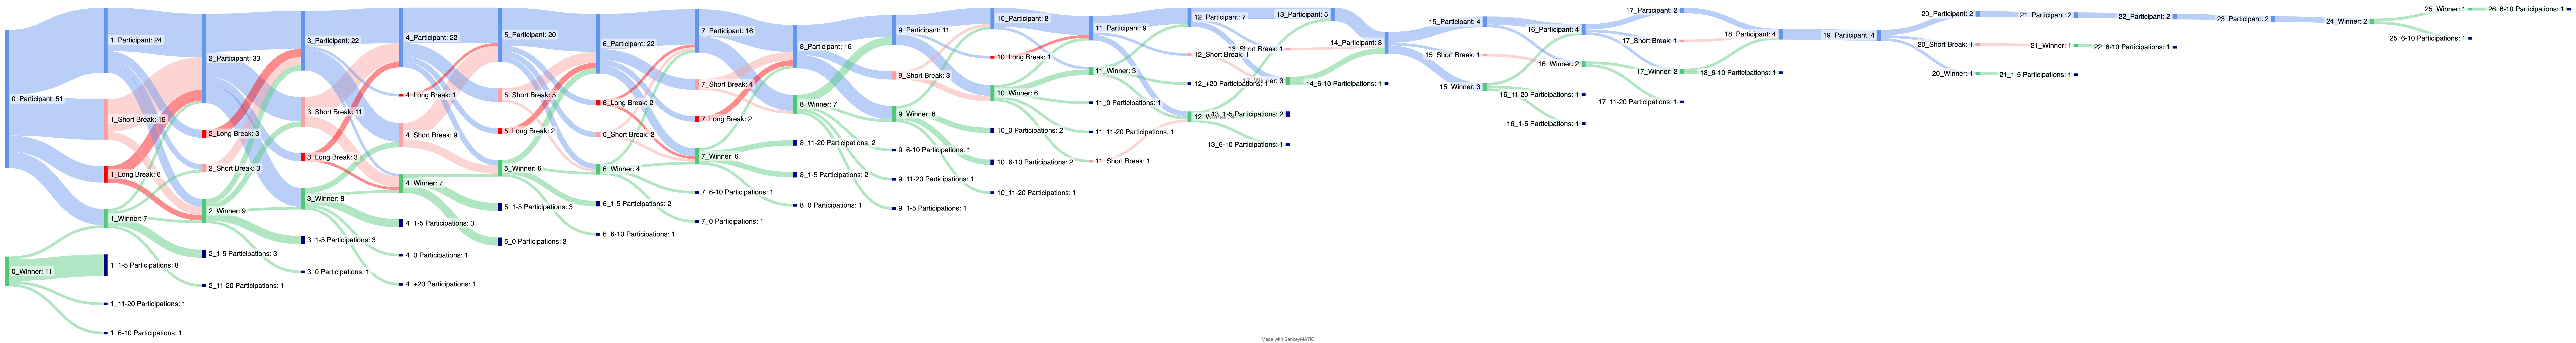

In [63]:
from IPython.display import Image
Image(filename='images/test_sankey.png')

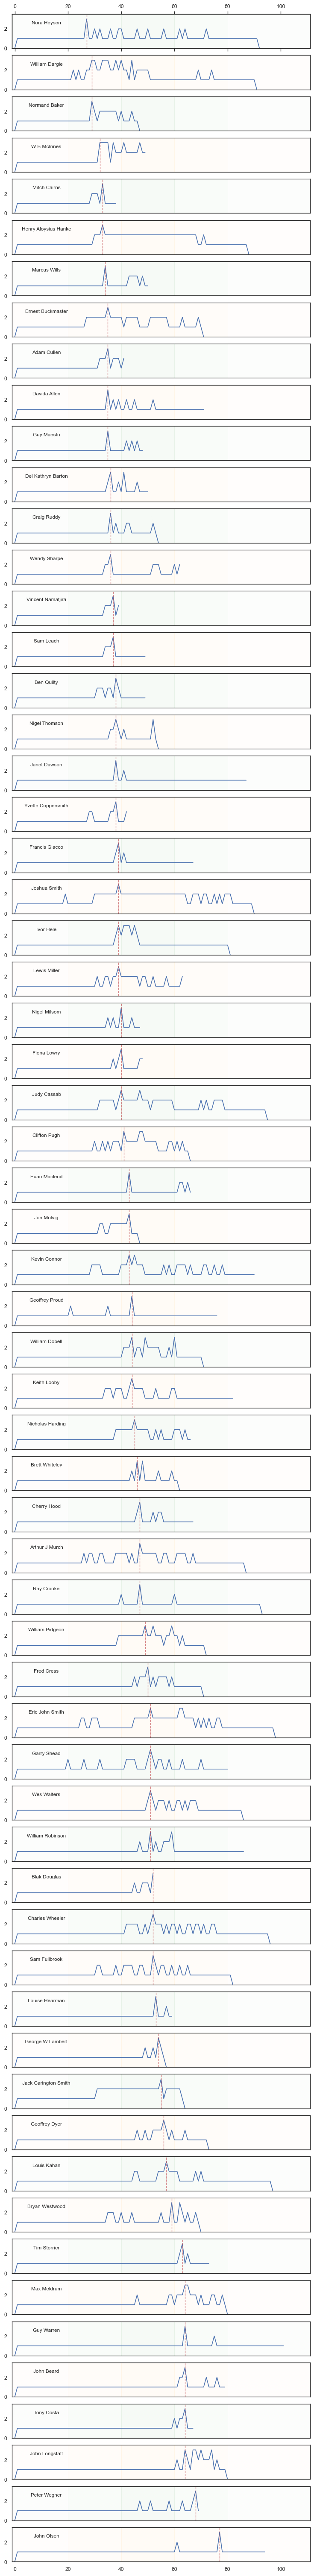

In [6]:
tt = artist_df.T

fig, axes = plt.subplots(tt.shape[1], 1, 
                         figsize=(9, tt.shape[1]*1.25), 
                         sharex=True)

# plot each col onto one ax
for idx,(col, ax) in enumerate(zip(tt.columns, axes.flat)):
    colour = 'green'
    
    if idx == 0: ax = ax.twiny()
    if idx % 2: colour = 'orange'
    
    tt[col].plot(ax=ax, rot=0)

    ttt = pd.DataFrame(tt[col])
    markthis = ttt[ttt[col] == 3].index[0]
    
    ax.axvline(markthis, color='r', linestyle='--', lw=1, alpha=0.7)
    ax.set_title(col,x=0.115, y=0.6, size=8.5)
    ax.set_ylim(0,3.5)
    ax.set_xlim(-1,111)
    ax.axvspan(-1, 20, alpha=0.01, color=colour)
    ax.axvspan(20, 40, alpha=0.025, color=colour)
    ax.axvspan(40, 60, alpha=0.035, color=colour)
    ax.axvspan(60, 80, alpha=0.025, color=colour)
    ax.axvspan(80, 111, alpha=0.01, color=colour)

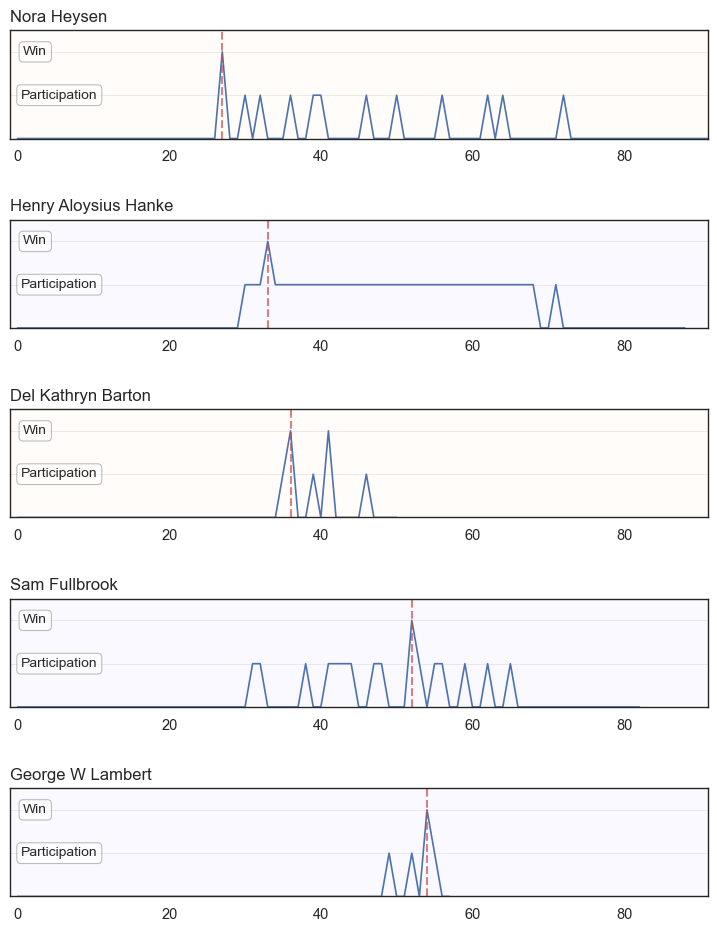

In [930]:
tt = artist_df.T

tt = tt[['Nora Heysen', 'Henry Aloysius Hanke', 'Del Kathryn Barton', 'Sam Fullbrook','George W Lambert']]

# subtract 1 from every number in dataframe
tt = tt - 1
tt[tt < 0] = 0

fig, axes = plt.subplots(tt.shape[1], 1, 
                         figsize=(9, tt.shape[1]*2.25), 
                         sharex=False)

# plot each col onto one ax
for idx,(col, ax) in enumerate(zip(tt.columns, axes.flat)):
    colour = 'orange'
    
    # if idx == 0: ax = ax.twiny()
    if idx % 2: colour = 'blue'

    if idx == 4: colour = 'blue'
    
    tt[col].plot(ax=ax, rot=0)

    ttt = pd.DataFrame(tt[col])
    markthis = ttt[ttt[col] == 2].index[0]

    # add grid
    ax.axhline(1, color='grey', linestyle='-', lw=0.5, alpha=0.2)
    ax.axhline(2, color='grey', linestyle='-', lw=0.5, alpha=0.2)
    
    
    ax.axvline(markthis, color='r', linestyle='--', lw=1.5, alpha=0.7)
    ax.set_title(col, size=12, loc='left')
    ax.set_ylim(0,2.5)
    ax.set_xlim(-1,91)
    # ax.axvspan(-1, 20, alpha=0.01, color=colour)
    ax.axvspan(-1, 111, alpha=0.025, color=colour)
    # ax.axvspan(40, 60, alpha=0.035, color=colour)
    # ax.axvspan(60, 80, alpha=0.025, color=colour)
    # ax.axvspan(80, 111, alpha=0.01, color=colour)

    # add annotation for y-axis ticks
    ax.annotate('Participation', xy=(5.5, 1), ha='center', va='center', size=10,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=0.5))
    ax.annotate('Win', xy=(0.75, 2), ha='left', va='center', size=10,
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=0.5))

    # remove y-axis
    ax.set_yticks([])

    # make x-ticks larger
    ax.tick_params(axis='x', labelsize=10.5)

# add more space between subplots 
fig.subplots_adjust(hspace=0.75)

# save figure
plt.savefig('chosen_trajectories.png', dpi=330, bbox_inches='tight')

plt.show()

#### Who is in the portrait?

In [895]:
archies['ANZSCO_1'].value_counts(normalize=True)

Arts and Media Professionals                                0.578431
Chief Executives, General Managers and Legislators          0.127451
Uncategorised                                               0.107843
Design, Engineering, Science and Transport Professionals    0.039216
Education Professionals                                     0.029412
Health Professionals                                        0.029412
Legal, Social and Welfare Professionals                     0.029412
Protective Service Workers                                  0.019608
Sports and Personal Service Workers                         0.019608
Hospitality, Retail and Service Managers                    0.019608
Name: ANZSCO_1, dtype: float64

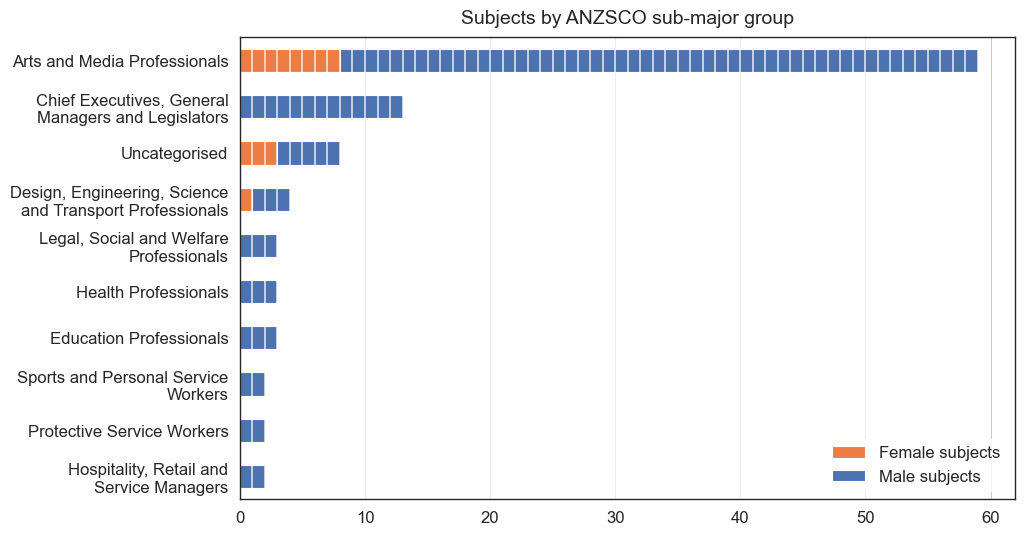

In [678]:
from matplotlib.pyplot import figure
archies['Decade'] = [ int(np.floor(int(year)/10) * 10) 
                       for year in np.array(archies["YEAR"])]

archies['ANZSCO_1'].fillna('Uncategorised', inplace=True)

from textwrap import wrap

t1 = pd.crosstab([ '\n'.join(wrap(line, 30)) for line in archies['ANZSCO_1']], # breaks strings into new lines
                 archies['GENDER'])
t1['total'] = t1['Female'] + t1['Male']
t1.columns = ['Female subjects', 'Male subjects', 'total']

# plot horizontal stacvked bar chart
t1.sort_values('total').drop('total',axis=1).plot.barh(stacked=True, figsize=(10, 6), color=['#EC7E45', '#4C72B0'])

# remove y=axis title
plt.ylabel('')

# increase y-axis tick size
plt.yticks(size=12)
plt.xticks(size=12)

# add vertical lines to show the 50% mark
for x in range(1,60,1):
    plt.axvline(x, color='white', linestyle='-', lw=1.25, alpha=0.75)

plt.legend(ncol=1, title='', fontsize=12, title_fontsize=10, loc='lower right', facecolor='white', edgecolor='white')

plt.title('Subjects by ANZSCO sub-major group', size=14, pad=10)

# add gird lines
plt.grid(axis='x')

# save figure
# plt.savefig('subject_by_anzsco.png', dpi=330, bbox_inches='tight')

plt.show()

<Figure size 800x600 with 0 Axes>

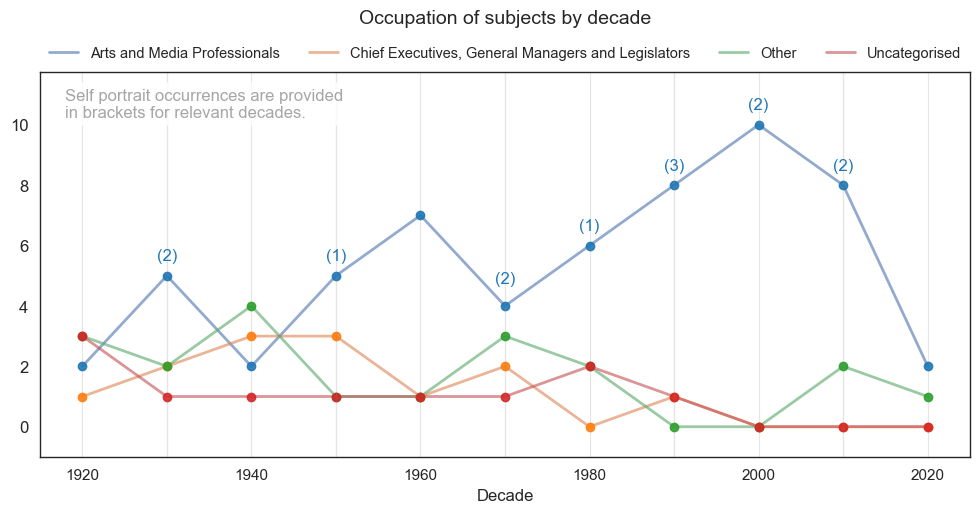

In [729]:
from matplotlib.pyplot import figure
archies['Decade'] = [ int(np.floor(int(year)/10) * 10) 
                       for year in np.array(archies["YEAR"])]

archies['ANZSCO_1'].fillna('Family/Friend', inplace=True)
archies['ANZSCO_1_v2'] = np.where(archies['ANZSCO_1'].isin(['Arts and Media Professionals',
                                                            'Chief Executives, General Managers and Legislators',
                                                            'Uncategorised']),archies['ANZSCO_1'],'Other')
t1 = pd.crosstab(archies['Decade'],archies['ANZSCO_1_v2'])

figure(figsize=(8, 6))

ax = t1.plot(linewidth=2, alpha=0.6)
plt.legend(ncol=4, bbox_to_anchor=(1, 1.1))
t1.plot(marker="o", markersize=6, alpha=0.9, ax=ax, linewidth=0, color=['#1f77b4','#ff7f0e','#2ca02c','#d62728'], legend=None)

# remove items from legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[:4], labels=labels[:4], ncol=4, bbox_to_anchor=(0.5, 1.1), 
          fontsize=10.5, loc='upper center', frameon=False)

# add grid lines for every 10 years
plt.grid(axis='x', alpha=0.5)

# add vertical lines for every 10 years
plt.axvline(1930, color='grey', linestyle='-', lw=1, alpha=0.2)
plt.axvline(1950, color='grey', linestyle='-', lw=1, alpha=0.2)
plt.axvline(1970, color='grey', linestyle='-', lw=1, alpha=0.2)
plt.axvline(1990, color='grey', linestyle='-', lw=1, alpha=0.2)
plt.axvline(2010, color='grey', linestyle='-', lw=1, alpha=0.2)

plt.title('Occupation of subjects by decade', size=14, pad=35)

# increae y-axis tick size
plt.yticks(size=12)
plt.xticks(size=11)

# increase x-axis title size
plt.xlabel('Decade', size=12)

# add annotations to the plot
plt.annotate('(2)', xy=(1930, 1), xytext=(1930, 5.5), size=12, color='tab:blue', ha='center')
plt.annotate('(1)', xy=(1950, 1), xytext=(1950, 5.5), size=12, color='tab:blue', ha='center')
plt.annotate('(2)', xy=(1970, 1), xytext=(1970, 4.75), size=12, color='tab:blue', ha='center')
plt.annotate('(1)', xy=(1980, 1), xytext=(1980, 6.5), size=12, color='tab:blue', ha='center')
plt.annotate('(3)', xy=(1990, 1), xytext=(1990, 8.5), size=12, color='tab:blue', ha='center')
plt.annotate('(2)', xy=(2000, 1), xytext=(2000, 10.5), size=12, color='tab:blue', ha='center')
plt.annotate('(2)', xy=(2010, 1), xytext=(2010, 8.5), size=12, color='tab:blue', ha='center')

# add box for annotation
plt.annotate('Self portrait occurrences are provided\nin brackets for relevant decades.', xy=(1918, 1), xytext=(1918, 10.25), 
             size=12, color='grey', ha='left', alpha=0.7, bbox=dict(boxstyle='round', fc='white', ec='white', alpha=0.8))


# increase y-axis
plt.ylim(-1, 11.75)

plt.savefig('subject_occupation_by_decade.png', dpi=330, bbox_inches='tight')

plt.show()

In [683]:
pd.crosstab(archies['Decade'],archies['Self'])

Self     0  1
Decade       
1920     9  0
1930     8  2
1940    10  0
1950     9  1
1960    10  0
1970     8  2
1980     9  1
1990     7  3
2000     8  2
2010     8  2
2020     3  0

<Figure size 800x600 with 0 Axes>

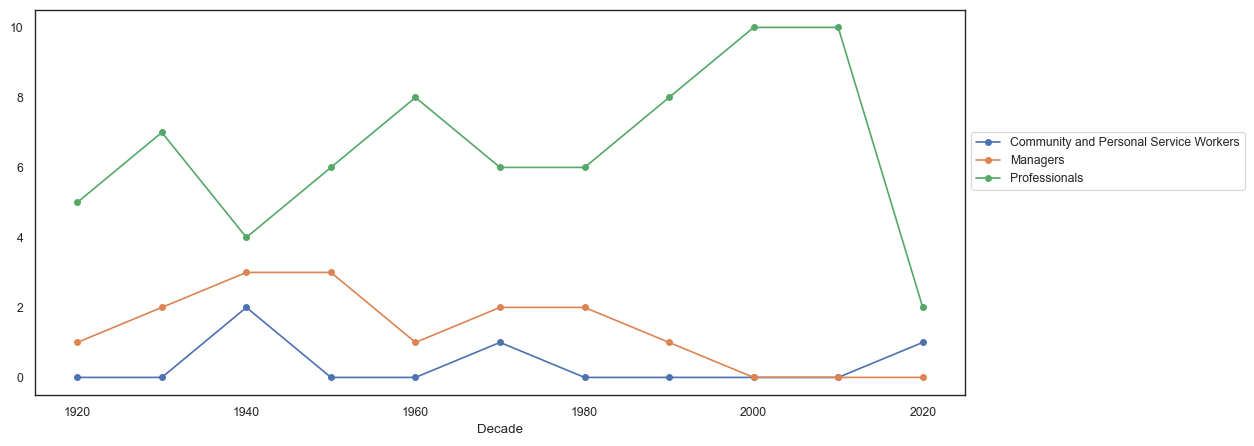

In [371]:
from matplotlib.pyplot import figure

t2 = pd.crosstab(archies['Decade'],archies['ANZSCO_2'])

figure(figsize=(8, 6))
t2.plot(marker="o", markersize=4)
plt.legend(ncol=1, bbox_to_anchor=(1, 0.7))
plt.show()

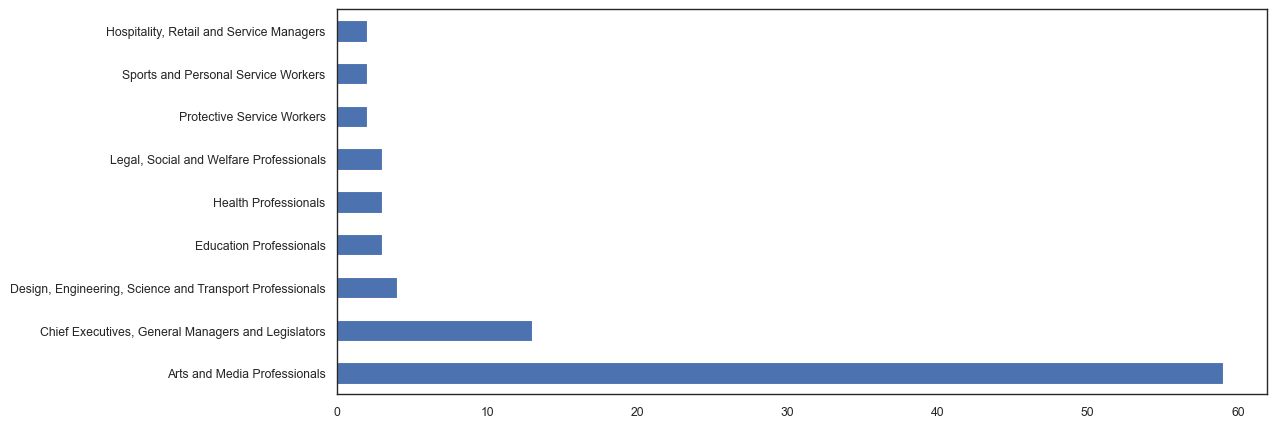

In [372]:
archies['ANZSCO_1'].value_counts().plot(kind='barh')
plt.show()

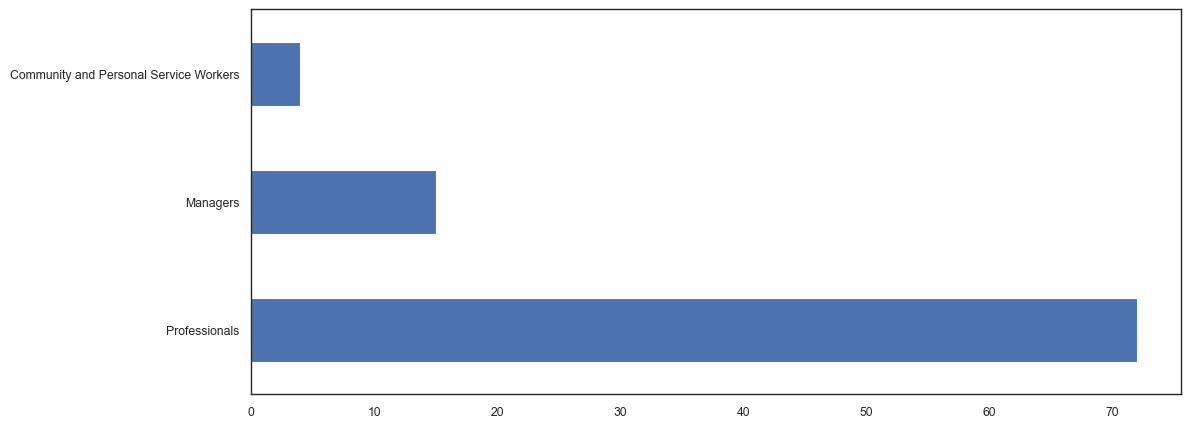

In [373]:
archies['ANZSCO_2'].value_counts().plot(kind='barh')
plt.show()

### Online presence of recent winners

- 2018: Yvette Coppersmith
- 2019: Tony Costa
- 2020: Vincent Namatjira 
- 2021: Peter Wegner
- 2022: Blak Douglas

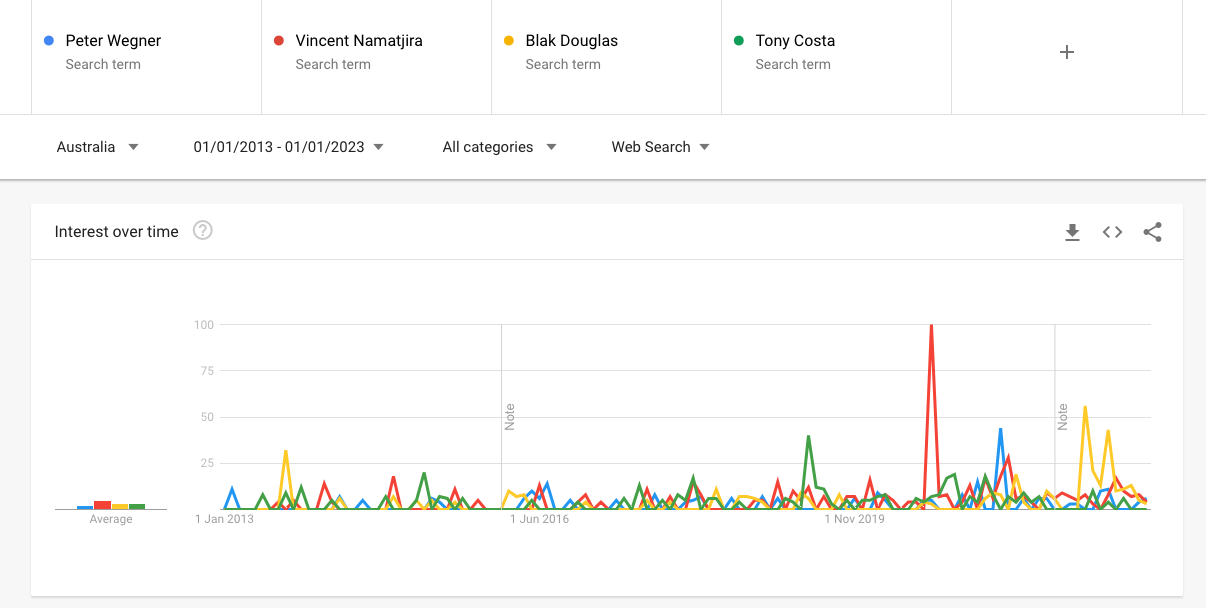

In [409]:
from IPython.display import Image
Image(filename='images/GoogleTrends.png')

<Figure size 1200x500 with 0 Axes>

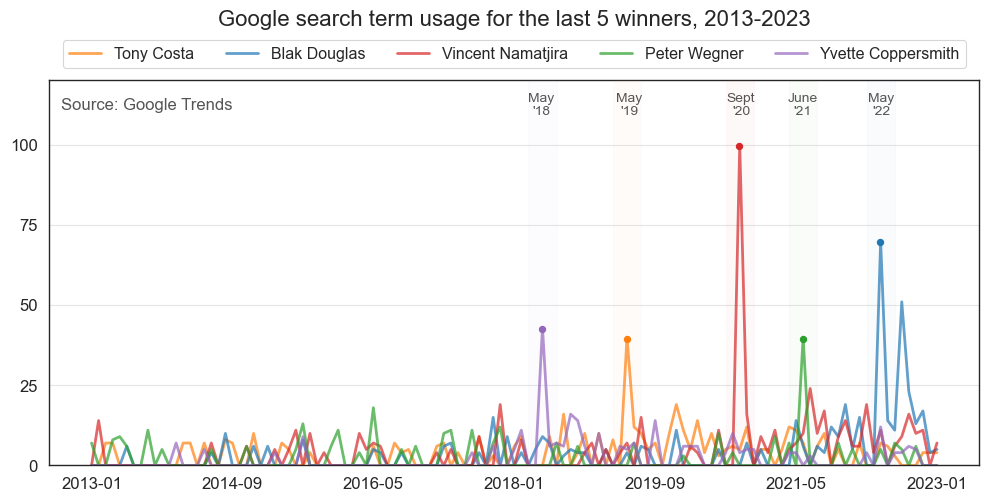

In [369]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# read data
googletrends = pd.read_csv('data/Last5Winners.csv')

sns.set(style='white', context='paper', rc={'figure.figsize':(12, 5)})

# plot a time series with Interest as the y-axis and x-axis in years
ax = googletrends.plot(x='Month', y='Tony Costa', color='tab:orange', linewidth=2, zorder=1, alpha=0.7)
googletrends.plot(x='Month', y='Blak Douglas', color='tab:blue', linewidth=2, zorder=1, ax=ax, alpha=0.7)
googletrends.plot(x='Month', y='Vincent Namatjira', color='tab:red', linewidth=2, zorder=1, ax=ax, alpha=0.7)
googletrends.plot(x='Month', y='Peter Wegner', color='tab:green', linewidth=2, zorder=1, ax=ax, alpha=0.7)
googletrends.plot(x='Month', y='Yvette Coppersmith', color='tab:purple', linewidth=2, zorder=1, ax=ax, alpha=0.7)

# add point hollow
ax.scatter(googletrends[googletrends['Month'] == '2018-05'].index.values[0],
           googletrends[googletrends['Month'] == '2018-05']['Yvette Coppersmith'].values[0]-.5,
           s=20, color='tab:purple', zorder=2)

ax.scatter(googletrends[googletrends['Month'] == '2019-05'].index.values[0],
           googletrends[googletrends['Month'] == '2019-05']['Tony Costa'].values[0]-.5,
           s=20, color='tab:orange', zorder=2)

ax.scatter(googletrends[googletrends['Month'] == '2020-09'].index.values[0]-.0345,
           googletrends[googletrends['Month'] == '2020-09']['Vincent Namatjira'].values[0]-.5,
           s=20, color='tab:red', zorder=2)

ax.scatter(googletrends[googletrends['Month'] == '2021-06'].index.values[0],
           googletrends[googletrends['Month'] == '2021-06']['Peter Wegner'].values[0]-.5,
           s=20, color='tab:green', zorder=2)

ax.scatter(googletrends[googletrends['Month'] == '2022-05'].index.values[0]-.025,
           googletrends[googletrends['Month'] == '2022-05']['Blak Douglas'].values[0]-.5,
           s=20, color='tab:blue', zorder=2)

# add source annotation in bottom right corner
plt.annotate('Source: Google Trends', xy=(0.0125, .925), xycoords='axes fraction', fontsize=12, color='#555555', zorder=2)

# add source annotation in bottom right corner
plt.annotate("May\n'18", xy=(googletrends[googletrends['Month'] == '2018-05'].index.values[0]/googletrends.shape[0], 0.91), 
             xycoords='axes fraction', fontsize=10, color='#555555', ha='center')

# add source annotation in bottom right corner
plt.annotate("May\n'19", xy=((googletrends[googletrends['Month'] == '2019-05'].index.values[0]-0.5)/googletrends.shape[0], 0.91), 
             xycoords='axes fraction', fontsize=10, color='#555555', ha='center')

# add source annotation in bottom right corner
plt.annotate("Sept\n'20", xy=((googletrends[googletrends['Month'] == '2020-09'].index.values[0]-2)/googletrends.shape[0], 0.91), 
             xycoords='axes fraction', fontsize=10, color='#555555', ha='center')

# add source annotation in bottom right corner
plt.annotate("June\n'21", xy=((googletrends[googletrends['Month'] == '2021-06'].index.values[0]-3)/googletrends.shape[0], 0.91), 
             xycoords='axes fraction', fontsize=10, color='#555555', ha='center')

# add source annotation in bottom right corner
plt.annotate("May\n'22", xy=((googletrends[googletrends['Month'] == '2022-05'].index.values[0]-3.75)/googletrends.shape[0], 0.91), 
             xycoords='axes fraction', fontsize=10, color='#555555', ha='center')

# shade plot for 2018
plt.axvspan(googletrends[googletrends['Month'] == '2018-03'].index.values[0], 
            googletrends[googletrends['Month'] == '2018-07'].index.values[0], 
            color='tab:purple', alpha=0.025, zorder=3)

# shade plot for 2019
plt.axvspan(googletrends[googletrends['Month'] == '2019-03'].index.values[0], 
            googletrends[googletrends['Month'] == '2019-07'].index.values[0], 
            color='tab:orange', alpha=0.025, zorder=3)

# shade plot for 2020
plt.axvspan(googletrends[googletrends['Month'] == '2020-07'].index.values[0], 
            googletrends[googletrends['Month'] == '2020-11'].index.values[0], 
            color='tab:red', alpha=0.025, zorder=3)

# shade plot for 2021
plt.axvspan(googletrends[googletrends['Month'] == '2021-04'].index.values[0], 
            googletrends[googletrends['Month'] == '2021-08'].index.values[0], 
            color='tab:green', alpha=0.025, zorder=3)

# shade plot for 2022
plt.axvspan(googletrends[googletrends['Month'] == '2022-03'].index.values[0], 
            googletrends[googletrends['Month'] == '2022-07'].index.values[0], 
            color='tab:blue', alpha=0.025, zorder=3)

plt.xlabel('')
plt.grid(axis='y', alpha=0.5)
plt.gca().set_axisbelow(True)
plt.yticks(np.arange(0, 110, 25), fontsize=12)
plt.xticks(fontsize=12)

plt.ylim(0, 120)

plt.title('Google search term usage for the last 5 winners, 2013-2023\n\n', fontsize=16)
plt.legend(loc='upper center', fontsize=11.5, bbox_to_anchor=(0.5, 1.125), ncol=5)

# save figure
# plt.savefig('google_trends_last_five_winners.png', dpi=330, bbox_inches='tight')

plt.show()

# Numbers represent search interest relative to the highest point on the chart for the given region and time. 
# A value of 100 is the peak popularity for the term. A value of 50 means that the term is half as popular. 
# A score of 0 means that there was not enough data for this term."